
<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Григорий! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# [Система прогнозирования покупательской активности и формирования персонализированных предложений для интернет-магазина «В один клик»](#toc1_)
- [Описание проекта](#toc1_1_)    
- [Импорт и подготовка к работе](#toc1_2_)    
- [Загрузка данных, общая информация и первичная обработка](#toc1_3_)    
  - [Скачивание датасетов и общая информация](#toc1_3_1_)    
  - [Вывод:](#toc1_3_2_)    
- [Предобработка данных](#toc1_4_)    
  - [Переименовывание столбцов датафреймов](#toc1_4_1_)    
  - [Обработка дубликатов и опечаток](#toc1_4_2_)    
  - [Обработка аномальных значений и выбросов](#toc1_4_3_)    
  - [Смена индекса датафреймов](#toc1_4_4_)    
  - [Приведение типов данных](#toc1_4_5_)    
  - [Вывод:](#toc1_4_6_)    
- [Анализ данных](#toc1_5_)    
  - [Функции отрисовок данных](#toc1_5_1_)    
  - [```market```](#toc1_5_2_)    
    - [Количественные](#toc1_5_2_1_)    
    - [Категориальные](#toc1_5_2_2_)    
  - [```market_money```](#toc1_5_3_)    
    - [Количественные](#toc1_5_3_1_)    
    - [Категориальные](#toc1_5_3_2_)    
  - [```market_time```](#toc1_5_4_)    
    - [Количественные](#toc1_5_4_1_)    
    - [Категориальные](#toc1_5_4_2_)    
  - [```money```](#toc1_5_5_)    
    - [Количественные](#toc1_5_5_1_)    
  - [Вывод:](#toc1_5_6_)    
- [Объединение таблиц](#toc1_6_)    
  - [**```market```** += **```market_money```**](#toc1_6_1_)    
  - [**```market```** += **```market_time```**](#toc1_6_2_)    
- [Корреляционный анализ](#toc1_7_)    
  - [Матрица корреляции](#toc1_7_1_)    
  - [Матрица значимости](#toc1_7_2_)    
  - [Вывод:](#toc1_7_3_)    
- [Модели](#toc1_8_)    
  - [Оценка моделей](#toc1_8_1_)    
  - [Пайплайн](#toc1_8_2_)    
  - [Перебор гиперпараметров через optuna](#toc1_8_3_)    
  - [Логистическая регрессия](#toc1_8_4_)    
    - [Подбор гиперпараметров](#toc1_8_4_1_)    
    - [Feature Engineering](#toc1_8_4_2_)    
  - [Дерево решений](#toc1_8_5_)    
    - [Подбор гиперпараметров](#toc1_8_5_1_)    
    - [Feature Engineering](#toc1_8_5_2_)    
  - [KNN](#toc1_8_6_)    
    - [Подбор гиперпараметров](#toc1_8_6_1_)    
    - [Feature Engineering](#toc1_8_6_2_)    
  - [Метод опорных векторов](#toc1_8_7_)    
    - [Подбор гиперпараметров](#toc1_8_7_1_)    
    - [Feature Engineering](#toc1_8_7_2_)    
  - [Вывод](#toc1_8_8_)    
- [Сегментация покупателей](#toc1_9_)    
  - [Категории для сегментации](#toc1_9_1_)    
    - [Коммуникация с клиентом](#toc1_9_1_1_)    
    - [Продуктовое поведение](#toc1_9_1_2_)    
    - [Поведение на сайте](#toc1_9_1_3_)    
    - [Финансовое поведение](#toc1_9_1_4_)    
  - [Вывод](#toc1_9_2_)    
- [Общий вывод](#toc1_10_)    
<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

_____
_____
## <a id='toc1_1_'></a>[Описание проекта](#toc0_)

Интернет-магазин «В один клик», стремящийся укрепить свою клиентскую базу, ставит перед собой задачу увеличить покупательскую активность постоянных клиентов. В условиях насыщенного рынка привлечение новых покупателей становится менее эффективным, поэтому компания фокусируется на удержании существующих клиентов. Для этого необходимо создать систему, которая будет помогать прогнозировать изменения в активности клиентов и формировать персонализированные предложения.

- **Цели и задачи проекта**:

    - **Прогнозирование покупательской активности**: Разработка модели машинного обучения, которая на основе данных о клиентах (покупательские предпочтения, взаимодействие с сайтом, финансовая активность) будет прогнозировать вероятность снижения их активности в ближайшие три месяца. Модель должна учитывать все ключевые аспекты, влияющие на изменения в поведении.

    - **Сегментация клиентов**: Использование данных о прибыльности и активности клиентов для создания сегментов. Это позволит компании выделить группы с высокой вероятностью снижения покупок или с особенностями, требующими персонализированного подхода.

    - **Разработка персонализированных стратегий**: Для каждой группы клиентов будут разработаны индивидуальные рекомендации. Они могут включать акционные предложения, улучшение качества взаимодействия или адаптацию продуктового ассортимента под запросы определённых сегментов.

    - **Ключевые требования к системе**:
        - Возможность прогнозировать изменения в покупательской активности с высокой точностью.
        - Гибкость в анализе сегментов и формировании предложений.
        - Простота интеграции решений в текущие бизнес-процессы компании.

_____
_____
## <a id='toc1_2_'></a>[Импорт и подготовка к работе](#toc0_)

In [1]:
%pip install numpy==1.23.5
%pip install numba==0.57.1
%pip install matplotlib==3.6.3
%pip install shap==0.41.0
%pip install pandas==2.0.3
%pip install plotly==5.15.0
%pip install bidict==0.22.1
%pip install phik==0.12.3
%pip install scikit-learn==1.2.2
%pip install scipy==1.9.3
%pip install optuna==3.0.5
%pip install category-encoders==2.6.1

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib==3.6.3 in c:\users\bezgr\study\ds\ya-practicum\.venv\lib\site-packages (3.6.3)



  Using cached shap-0.41.0.tar.gz (380 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached slicer-0.0.7-py3-none-any.whl.metadata (3.7 kB)
Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
Failed to build shap
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for shap (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [117 lines of output]
      The nvcc binary could not be located in your $PATH. Either  add it to your path, or set $CUDAHOME to enable CUDA
      Error building cuda module: TypeError('cannot unpack non-iterable NoneType object')
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-311\shap
      copying shap\datasets.py -> build\lib.win-amd64-cpython-311\shap
      copying shap\links.py -> build\lib.win-amd64-cpython-311\shap
      copying shap\_explanation.py -> build\lib.win-amd64-cpython-311\shap
      copying shap\_serializable.py -> build\lib.win-amd64-cpython-311\shap
      copying shap\__init__.py -> build\lib.win-amd64-cpython-311\shap
      creating build\lib.win-amd64-cpython-311\shap\explainers
      copying shap\explainers\mimic.py -> build\lib.win-amd64-cpython-311\shap\explainers

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


  Using cached optuna-3.0.5-py3-none-any.whl.metadata (15 kB)
  Using cached cliff-4.8.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached cmaes-0.11.1-py3-none-any.whl.metadata (18 kB)
  Using cached importlib_metadata-4.13.0-py3-none-any.whl.metadata (4.9 kB)
INFO: pip is looking at multiple versions of optuna to determine which version is compatible with other requirements. This could take a while.
Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement scipy<1.9.0,>=1.7.0 (from optuna) (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0

Note: you may need to restart the kernel to use updated packages.


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Это лучше   раскомментировать, Или использовать конструкцию try/except

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
не понял про try/except
</div>

In [2]:
from copy import deepcopy
from itertools import cycle
from pprint import pprint
from typing import Literal

import numpy as np
import optuna
import pandas as pd
import phik
import shap
from bidict import bidict
from category_encoders import (JamesSteinEncoder,
                               LeaveOneOutEncoder,
                               MEstimateEncoder,
                               WOEEncoder)
from optuna.visualization import plot_param_importances
from plotly.colors import find_intermediate_color, hex_to_rgb
from plotly.subplots import make_subplots
from plotly import express as px, graph_objects as go
from sklearn.base import clone
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (MinMaxScaler,
                                   OneHotEncoder,
                                   OrdinalEncoder,
                                   StandardScaler)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

c:\Users\bezgr\STUDY\DS\Ya-Practicum\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">


Совет:

   

- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 

 

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Блин, ну тут я пытался по pep8 раскидать импорт

- то есть сперва встроенные, потом доп библиотеки, потом зависимости
- по алфавиту

Забыл про то как надо форматировать снос строки при большом кол-во импортов через from? исправил

</div>

In [3]:
pd.set_option('display.max_columns', None)
optuna.logging.set_verbosity(optuna.logging.WARNING)
RANDOM_STATE = 42


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍За настроечки


 
 

_____
_____
## <a id='toc1_3_'></a>[Загрузка данных, общая информация и первичная обработка](#toc0_)

_____
### <a id='toc1_3_1_'></a>[Скачивание датасетов и общая информация](#toc0_)

1. **```market_file.csv```**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

|Поле                               |Описание                                                                                                            |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------|
|id                                 |Номер покупателя в корпоративной базе данных                                                                        |
|Покупательская активность          |Рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»                   |
|Тип сервиса                        |Уровень серви са, например «премиум» и «стандарт»                                                                    |
|Разрешить сообщать                 |Информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель|
|Маркет_актив_6_мес                 |Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента|
|Маркет_актив_тек_мес               |Количество маркетинговых коммуникаций в текущем месяце                                                              |
|Длительность                       |Значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте                         |
|Акционные_покупки                  |Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев                                 |
|Популярная_категория               |Самая популярная категория товаров у покупателя за последние 6 месяцев                                              |
|Средний_просмотр_категорий_за_визит|Показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца                  |
|Неоплаченные_продукты_штук_квартал |Общее число неоплаченных товаров в корзине за последние 3 месяца                                                    |
|Ошибка_сервиса                     |Число сбоев, которые коснулись покупателя во время посещения сайта                                                  |
|Страниц_за_визит                   |Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца               |

In [4]:
try:
    market = pd.read_csv('market_file.csv', delimiter=',')
except:
    market = pd.read_csv('/datasets/market_file.csv', delimiter=',')
display(market.head(10))
market.info()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

2. **```market_money.csv```**

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

|Поле   |Описание                                                                                                   |
|-------|-----------------------------------------------------------------------------------------------------------|
|id     |Номер покупателя в корпоративной базе данных                                                               |
|Период |Название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'|
|Выручка|Сумма выручки за период                                                                                    |


In [5]:
try:
    market_money = pd.read_csv('market_money.csv', delimiter=',')
except:
    market_money = pd.read_csv('/datasets/market_money.csv', delimiter=',')
display(market_money.head(10))
market_money.info()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


3. **```market_time.csv```**

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

|Поле  |Описание                                                     |
|------|-------------------------------------------------------------|
|id    |Номер покупателя в корпоративной базе данных                 |
|Период|Название периода, во время которого зафиксировано общее время|
|Минут |Значение времени, проведённого на сайте, в минутах           |


In [6]:
try:
    market_time = pd.read_csv('market_time.csv', delimiter=',')
except:
    market_time = pd.read_csv('/datasets/market_time.csv', delimiter=',')
display(market_time.head(10))
market_time.info()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


4. **```money.csv```**

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

|Поле   |Описание                                    |
|-------|--------------------------------------------|
|id     |Номер покупателя в корпоративной базе данных|
|Прибыль|Значение прибыли                            |

In [7]:
try:
    money = pd.read_csv('money.csv', delimiter=';', decimal=',')
except:
    money = pd.read_csv('/datasets/money.csv', delimiter=';', decimal=',')
display(money.head(10))
money.info()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Успех:    
    

- decimal  правильно проставленны 



- молодец что используешь конструкцию try - except (if - else), этим ты проявляешь уважение к тем кто будет работать с твоим кодом.


 


_____
### <a id='toc1_3_2_'></a>[Вывод:](#toc0_)

- ```market_file``` (```market_file.csv```)  
    - Содержит данные о покупательской активности клиентов, типах обслуживания, маркетинговой активности, и других аспектах взаимодействия с клиентами.  
    - Всего 1300 строк.  
    - Пропущенных значений нет.  
    - 7 количественных признаков: ```Маркет_актив_6_мес```, ```Маркет_актив_тек_мес```, ```Длительность```, ```Акционные_покупки```, ```Средний_просмотр_категорий_за_визит```, ```Неоплаченные_продукты_штук_квартал```, ```Страниц_за_визит```.  
    - 4 категориальных признака: ```Покупательская активность```, ```Тип сервиса```, ```Разрешить сообщать```, ```Популярная_категория```.  
    - Типы данных верные.  

- ```market_money``` (```market_money.csv```)  
    - Хранит информацию о выручке клиентов за разные периоды.  
    - Всего 3900 строк.  
    - Пропущенных значений нет.  
    - 1 количественный признак: ```Выручка```.  
    - 1 категориальный признак: ```Период```.  
    - Типы данных верные.  

- ```market_time``` (```market_time.csv```)  
    - Содержит данные о времени, проведённом клиентами на сайте в разные периоды.  
    - Всего 2600 строк.  
    - Пропущенных значений нет.  
    - 1 количественный признак: ```минут```.  
    - 1 категориальный признак: ```Период```.  
    - Типы данных верные.  

- ```money``` (```money.csv```)  
    - Содержит информацию о прибыли клиентов.  
    - Всего 1300 строк.  
    - Пропущенных значений нет.  
    - 1 количественный признак: ```Прибыль```.  
    - Типы данных верные.  


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

 
    
- данные загружены корректно
    

	
- предварительный обзор данных сделан

   

<div class="alert alert-warning">
 

Совет 🤔:
    

 
    
- сейчас это не нужно (пока лучше вручную прописывать все эти .info, count_values, .describe, .diplicate...) но в будущем можешь обратить внимание на библиотечки, в которых уже собран необходимый минимум для EDA (и не только минимум), например [ydata_profiling](https://docs.profiling.ydata.ai/4.5/) или [pandas_profiling](https://habr.com/ru/companies/ruvds/articles/451478/) - будет информативно и красиво. Правда они довольно тяжелые,  кроме того требуют определённых версий других библиотек, что может потянуть за собой проблемы 

 


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Супер, дополню этим инструментом сборный проект.
</div>

_____
_____
## <a id='toc1_4_'></a>[Предобработка данных](#toc0_)

_____
### <a id='toc1_4_1_'></a>[Переименовывание столбцов датафреймов](#toc0_)

1. **```market```**

In [8]:
market_columns_translate = bidict({
    'id': 'id',
    'Покупательская активность': 'customer_activity',
    'Тип сервиса': 'service_type',
    'Разрешить сообщать': 'allow_notifications',
    'Маркет_актив_6_мес': 'marketing_activity_6_months',
    'Маркет_актив_тек_мес': 'current_month_marketing_activity',
    'Длительность': 'registration_duration',
    'Акционные_покупки': 'promotional_purchases',
    'Популярная_категория': 'popular_category',
    'Средний_просмотр_категорий_за_визит': 'avg_categories_per_visit',
    'Неоплаченные_продукты_штук_квартал': 'unpaid_products_quarter',
    'Ошибка_сервиса': 'service_errors',
    'Страниц_за_визит': 'pages_per_visit',
})

market = market.rename(columns=market_columns_translate)
market.head()

,id,customer_activity,service_type,allow_notifications,marketing_activity_6_months,current_month_marketing_activity,registration_duration,promotional_purchases,popular_category,avg_categories_per_visit,unpaid_products_quarter,service_errors,pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


|Поле                               |Описание                                                                                                            |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------|
|id                                 |Номер покупателя в корпоративной базе данных                                                                        |
|customer_activity                  |Рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»                   |
|service_type                       |Уровень серви са, например «премиум» и «стандарт»                                                                   |
|allow_notifications                |Информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель|
|marketing_activity_6_months        |Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента|
|current_month_marketing_activity   |Количество маркетинговых коммуникаций в текущем месяце                                                              |
|registration_duration              |Значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте                         |
|promotional_purchases              |Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев                                 |
|popular_category                   |Самая популярная категория товаров у покупателя за последние 6 месяцев                                              |
|avg_categories_per_visit           |Показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца                  |
|unpaid_products_quarter            |Общее число неоплаченных товаров в корзине за последние 3 месяца                                                    |
|service_errors                     |Число сбоев, которые коснулись покупателя во время посещения сайта                                                  |
|pages_per_visit                    |Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца               |

2. **```market_money```**

In [9]:
market_money_columns_translate = bidict({
    'id': 'id',
    'Период': 'period',
    'Выручка': 'revenue'
})

market_money = market_money.rename(columns=market_money_columns_translate)
market_money.head()

,id,period,revenue
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


|Поле   |Описание                                                                                                   |
|-------|-----------------------------------------------------------------------------------------------------------|
|id     |Номер покупателя в корпоративной базе данных                                                               |
|period |Название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'|
|revenue|Сумма выручки за период                                                                                    |

3. **```market_time```**

In [10]:
market_time_columns_translate = bidict({
    'id': 'id',
    'Период': 'period',
    'минут': 'minutes'
})

market_time = market_time.rename(columns=market_time_columns_translate)
market_time.head()

,id,period,minutes
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


|Поле   |Описание                                                     |
|-------|-------------------------------------------------------------|
|id     |Номер покупателя в корпоративной базе данных                 |
|period |Название периода, во время которого зафиксировано общее время|
|minutes|Значение времени, проведённого на сайте, в минутах           |

4. **```money```**

In [11]:
money_columns_translate = bidict({
    'id': 'id',
    'Прибыль': 'profit'
})

money = money.rename(columns=money_columns_translate)
money.head()

,id,profit
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


|Поле       |Описание                                    |
|-----------|--------------------------------------------|
|id         |Номер покупателя в корпоративной базе данных|
|profit     |Значение прибыли                            |


_____
### <a id='toc1_4_2_'></a>[Обработка дубликатов и опечаток](#toc0_)

- ***Явные***

In [12]:
print('Кол-во неявных дубликатов в market:\t', market['id'].duplicated().sum())
print('Кол-во неявных дубликатов в market_money:\t', market_money[['id', 'period']].duplicated().sum())
print('Кол-во неявных дубликатов в market_time:\t', market_time[['id', 'period']].duplicated().sum())
print('Кол-во неявных дубликатов в money:\t\t', money['id'].duplicated().sum())

Кол-во неявных дубликатов в market:	 0
Кол-во неявных дубликатов в market_money:	 0
Кол-во неявных дубликатов в market_time:	 0
Кол-во неявных дубликатов в money:		 0


- ***Неявные***

1. **```market```**

In [13]:
for categorical_col in market.select_dtypes(exclude='number').columns:
    print(f'Уникальные значения {categorical_col:<12}\t: {market[categorical_col].unique().tolist()}')

Уникальные значения customer_activity	: ['Снизилась', 'Прежний уровень']
Уникальные значения service_type	: ['премиум', 'стандартт', 'стандарт']
Уникальные значения allow_notifications	: ['да', 'нет']
Уникальные значения popular_category	: ['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары', 'Техника для красоты и здоровья', 'Кухонная посуда', 'Мелкая бытовая техника и электроника']


- В столбце ```service_type``` есть неявный дубликат ("стандартт" и "стандарт")

In [14]:
market.service_type = market.service_type.replace('стандартт', 'стандарт')
print(f'Уникальные значения service_type: {market.service_type.unique()}')

Уникальные значения service_type: ['премиум' 'стандарт']


2. **```market_money```**

In [15]:
for categorical_col in market_money.select_dtypes(exclude='number').columns:
    print(f'Уникальные значения {categorical_col:6} : {market_money[categorical_col].unique().tolist()}')

Уникальные значения period : ['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']


Неявные дубликаты отсутствуют

3. **```market_time```**

In [16]:
for categorical_col in market_time.select_dtypes(exclude='number').columns:
    print(f'Уникальные значения {categorical_col:6} : {market_time[categorical_col].unique().tolist()}')

Уникальные значения period : ['текущий_месяц', 'предыдцщий_месяц']


- В столбце ```period``` есть опечатка - "предыдцщий_месяц"

In [17]:
market_time.period = market_time.period.replace('предыдцщий_месяц', 'предыдущий_месяц')
print(f'Уникальные значения period: {market_time.period.unique()}')

Уникальные значения period: ['текущий_месяц' 'предыдущий_месяц']


4. **```money```**

In [18]:
for categorical_col in money.select_dtypes(exclude='number').columns:
    print(f'Уникальные значения {categorical_col:6} : {money[categorical_col].unique().tolist()}')

Неявные дубликаты отсутствуют

_____
### <a id='toc1_4_3_'></a>[Обработка аномальных значений и выбросов](#toc0_)

1. **```market```**

In [19]:
cols = 3
fig = make_subplots(rows=3, cols=cols, vertical_spacing=0.07,
                    subplot_titles=[market_columns_translate.inverse[name]
                                    for name in market.select_dtypes(include=['number']).columns])

for i, column in enumerate(market.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=market[column], name=''),
        row=(i // cols) + 1, col=(i % cols) + 1
    )
fig.update_layout(height=1200, width=1000, showlegend=False, title='График "Ящик с усами" для каждой количественной фичи в market')
fig.show()

- Единственное, что может смущает это выбивающие значения ```Акционные_покупки```, однако природой таких значений являются покупатели, которые "гоняются" за скидками.

2. **```market_money```**

In [20]:
cols = 2
fig = make_subplots(rows=1, cols=cols, vertical_spacing=0.07,
                    subplot_titles=[market_money_columns_translate.inverse[name]
                                    for name in market_money.select_dtypes(include=['number']).columns])

for i, column in enumerate(market_money.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=market_money[column], name=''),
        row=(i // cols) + 1, col=(i % cols) + 1
    )
fig.update_layout(height=500, width=1000, showlegend=False, title='График "Ящик с усами" для каждой количественной фичи в market_money')
fig.show()

- Значением ≈ 106к в фиче ```Выручка``` однозначно выброс. Это может быть либо какой-нибудь перекупщик, либо ошибка в данных (выручка в копейках), но в любом случае такое значение на является валидным дл обучения модели.
- Также значение 0 в фиче ```Выручка``` однозначно выброс. Скорее всего это ошибка в сборе данных или последствие отмены покупки.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


Обращено внимание на выброс, здорово что не забываешь писать возможные причины


 

In [21]:
display(market_money[(market_money.revenue > 8000) | (market_money.revenue == 0)])
market_money = market_money.query('0 < revenue < 8000')

,id,period,revenue
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0
98,215380,текущий_месяц,106862.2


3. **```market_time```**

In [22]:
cols = 2
fig = make_subplots(rows=1, cols=cols, vertical_spacing=0.07,
                    subplot_titles=[market_time_columns_translate.inverse[name]
                                    for name in market_time.select_dtypes(include=['number']).columns])

for i, column in enumerate(market_time.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=market_time[column], name=''),
        row=(i // cols) + 1, col=(i % cols) + 1
    )
fig.update_layout(height=500, width=1000, showlegend=False, title='График "Ящик с усами" для каждой количественной фичи в market_time')
fig.show()

4. **```money```**

In [ ]:
cols = 2
fig = make_subplots(rows=1, cols=cols, vertical_spacing=0.07,
                    subplot_titles=[money_columns_translate.inverse[name]
                                    for name in money.select_dtypes(include=['number']).columns])

for i, column in enumerate(money.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=money[column], name=''),
        row=(i // cols) + 1, col=(i % cols) + 1
    )
fig.update_layout(height=500, width=1000, showlegend=False, title='График "Ящик с усами" для каждой количественной фичи в money')
fig.show()

- Значение прибыли скорее всего выражено в тысячах. Приведем в общую для данных систему измерения (просто рубли).

In [24]:
money.profit *= 1000
money.profit = money.profit.astype(int)
money.head()

,id,profit
0,215348,980
1,215349,4160
2,215350,3130
3,215351,4870
4,215352,4210


_____
### <a id='toc1_4_4_'></a>[Смена индекса датафреймов](#toc0_)

In [25]:
market = market.set_index('id')
market_money = market_money.set_index('id')
market_time = market_time.set_index('id')
money = money.set_index('id')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍Полезное действие


 

_____
### <a id='toc1_4_5_'></a>[Приведение типов данных](#toc0_)

Все типы и так указаны верно, однако я привел таргет к pd.Categorical, для удобства работы в дальнейшем.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Всё-таки у этого типа данных есть как свои плюсы так свои минусы.  В общем это действие ничего не изменило, графики - это строить не мешало,  На работу с категориальным и всё равно начисляем с помощью OHE/OE, но здорово что вообще обратил на это внимание 
    
    
 


Если интересно, на просторах интернета можно найти  функцию для такого рода работы в автоматическом режиме, он подойдёт когда у нас будет большой датасет, и встанет вопрос как бы сэкономить ресурсы 


    # Оптимизация числовых типов данных
    def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
        '''
        Function optimizes memory usage in dataframe
        df: pd.DataFrame - data table
        print_size: bool - display of optimization results
        return pd.DataFrame - amount of optimized memory
        '''
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
        # Размер занимаемой памяти до оптимизации (в Мб)
        before_size = df.memory_usage().sum() / 1024**2    
        for column in df.columns:
            column_type = df[column].dtypes
            if column_type in numerics:
                column_min = df[column].min()
                column_max = df[column].max()
                if str(column_type).startswith('int'):
                    if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                        df[column] = df[column].astype(np.int8)
                    elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                        df[column] = df[column].astype(np.int16)
                    elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                        df[column] = df[column].astype(np.int32)
                    elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                        df[column] = df[column].astype(np.int64)  
                else:
                    if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                        df[column] = df[column].astype(np.float32)
                    else:
                        df[column] = df[column].astype(np.float64)    
        # Размер занимаемой памяти после оптимизации (в Мб)
        after_size = df.memory_usage().sum() / 1024**2
        if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                             .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
        return df
                                                                                                   
                                                                                                   
Проверяет минимальное и максимальное значения в столбце. Если значения могут уместиться в типе данных меньшего размера (например, np.int8 вместо np.int16), столбец конвертируется в более компактный тип данных. И для оценки стоило всё это начинать, подсчитывается размер занимаемой памяти DataFrame до и после оптимизации и выводит разницу в процентах
                                                                                                   

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Про память понял, буду знать. А по поводу необходимости pd.Categorical: Я сделал конкретно так, потому что считаю такой "энкодер" таргета удобнее вместо LabelEncoder, так как нет лишних переменных по типу y_train_encoded (+ test и val). Далее при обучении и подсчете метрик я использую просто pd.Series.cat.codes, что по моему сильно разгружает и так объемный проект.
</div>

In [26]:
market.customer_activity = pd.Categorical(market.customer_activity, categories=['Прежний уровень', 'Снизилась'], ordered=True)
market.allow_notifications = pd.Categorical(market.allow_notifications, categories=['нет', 'да'], ordered=True)
market.service_type = pd.Categorical(market.service_type, categories=['стандарт', 'премиум'], ordered=True)
market_money.period = pd.Categorical(market_money.period, categories=['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц'], ordered=True)
market_time.period = pd.Categorical(market_time.period, categories=['предыдущий_месяц', 'текущий_месяц'], ordered=True)

*Определив какой класс в таргете положительный, а какой отрицательный, настроем shap*

In [27]:
shap.plots._labels.labels['FEATURE_VALUE_LOW'] = 'Прежний уровень'
shap.plots._labels.labels['FEATURE_VALUE_HIGH'] = 'Снизилась'

В таргете ```customer_activity```:
- "Снизилась" = 1
- "Прежний уровень" = 0

_____
### <a id='toc1_4_6_'></a>[Вывод:](#toc0_)

- Везде переименовал столбцы на корректные названия.
- Обработал дубликаты и опечатки, которые могли бы помещать обучению моделей (т.к класс по факту один, а технически их два)
- Обработал аномальные значения и выбросы. Кол-во строк в market_money было 3900, а стало 3893.

- **```market_file```**:

|Старые имена                           |Новые имена                        |Описание                                                                                                            |
|---------------------------------------|-----------------------------------|--------------------------------------------------------------------------------------------------------------------|
|id                                     |id                                 |Номер покупателя в корпоративной базе данных                                                                        |
|~~Покупательская активность~~          |customer_activity                  |Рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»                   |
|~~Тип сервиса~~                        |service_type                       |Уровень серви са, например «премиум» и «стандарт»                                                                    |
|~~Разрешить сообщать~~                 |allow_notifications                |Информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель|
|~~Маркет_актив_6_мес~~                 |marketing_activity_6_months        |Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента|
|~~Маркет_актив_тек_мес~~               |current_month_marketing_activity   |Количество маркетинговых коммуникаций в текущем месяце                                                              |
|~~Длительность~~                       |registration_duration              |Значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте                         |
|~~Акционные_покупки~~                  |promotional_purchases              |Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев                                 |
|~~Популярная_категория~~               |popular_category                   |Самая популярная категория товаров у покупателя за последние 6 месяцев                                              |
|~~Средний_просмотр_категорий_за_визит~~|avg_categories_per_visit           |Показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца                  |
|~~Неоплаченные_продукты_штук_квартал~~ |unpaid_products_quarter            |Общее число неоплаченных товаров в корзине за последние 3 месяца                                                    |
|~~Ошибка_сервиса~~                     |service_errors                     |Число сбоев, которые коснулись покупателя во время посещения сайта                                                  |
|~~Страниц_за_визит~~                   |pages_per_visit                    |Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца               |

- **```market_money```**:

|Старые имена|Новые имена|Описание                                                                                                   |
|------------|-----------|-----------------------------------------------------------------------------------------------------------|
|id          |id         |Номер покупателя в корпоративной базе данных                                                               |
|~~Период~~  |period     |Название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'|
|~~Выручка~~ |revenue    |Сумма выручки за период                                                                                    |

- **```market_time```**:

|Старые имена|Новые имена|Описание                                                     |
|------------|-----------|-------------------------------------------------------------|
|id          |id         |Номер покупателя в корпоративной базе данных                 |
|~~Период~~  |period     |Название периода, во время которого зафиксировано общее время|
|~~Минут~~   |minutes    |Значение времени, проведённого на сайте, в минутах           |


- **```money```**:

|Старые имена|Новые имена|Описание                                    |
|------------|-----------|--------------------------------------------|
|id          |id         |Номер покупателя в корпоративной базе данных|
|~~Прибыль~~ |profit     |Значение прибыли                            |

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:




- помнишь о стилистике. Молодец что используешь rename,  чтобы не думать о порядке. 

 

- здорово что обращено внимание на  скрытые дубликаты    и опечатки 
    
  


<div class="alert alert-warning">

Совет: 



- можно еще поискать опечатку  (кстати повлияют ли они  на работу модели?)

  
 
 
 
- можно было автоматизировать процесс приведения к змеиному стилю воспользовавшись  .lower, а с помощью регуляризации    (или .rename) избавиться от точек, % итп, а если надо организовать нижние подчёркивание (привезти название столбцов к змеиному коду). Ведь нет жёсткого правила приводить название столбцов к латинице. Пример регулярного выражения:  
     
	df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]
      
    
    

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Ну это вкусовщина, к примеру мне удобнее иногда обращаться к столбцам pd.DataFrame как к атрибутам
</div>

_____
_____
## <a id='toc1_5_'></a>[Анализ данных](#toc0_)

_____
### <a id='toc1_5_1_'></a>[Функции отрисовок данных](#toc0_)

In [28]:
def statistical_graphis_for_categorical(data: pd.Series, hist_title, agg:Literal['val_count', 'sum']='val_count', top_n_in_pie=5):
    """
    Функция для построения графиков по категориальным данным: столбчатые диаграммы и круговой диаграммы.
    
    Parameters
    ----------
    data : pd.Series
        Входные данные в виде столбца (серии) pandas, представляющие категориальную переменную.
        
    hist_title : str
        Заголовок для оси y на гистограмме, отображающий наименования категорий.
        
    agg : {'val_count', 'sum'}, по умолчанию 'val_count'
        Метод агрегации для категориальных данных:
        - 'val_count' — подсчитывает количество наблюдений в каждой категории.
        - 'sum' — суммирует значения в каждой категории (например, для числовых категорий).
        
    top_n_in_pie : int, по умолчанию 5
        Количество топ-N категорий, которые будут отображены на круговой диаграмме.
        Остальные категории будут объединены в одну категорию "Остальные".
    """
    fig = make_subplots(
        rows=1, cols=2, specs=[[{'type': 'xy'}, {'type': 'domain'}]],
        subplot_titles=('Гистограмма', 'Круговая диаграмма')
    )
    if agg == 'val_count':
        category_agg = data.value_counts()
    elif agg == 'sum':
        category_agg = data.sum()
    else:
        raise ValueError('agg="val_count"|"sum"')
    categories = category_agg.index
    val_agg = category_agg.values

    fig.add_trace(
        go.Bar(
            x=val_agg, y=categories, 
            orientation='h',
            marker_color='green', 
            showlegend=False, 
            name=data.name,
            width=0.8
        ),
        row=1, col=1
    )
    fig.update_xaxes(title_text='Частота' if agg == 'val_count' else 'Сумма', row=1, col=1)
    fig.update_yaxes(title_text=hist_title, tickvals=categories, row=1, col=1)

    other = [category_agg[top_n_in_pie:].sum()]
    fig.add_trace(
        go.Pie(labels=category_agg.head(top_n_in_pie).index.tolist() + (['Остальные'] if other[0] else []),
               values=category_agg.head(top_n_in_pie).values.tolist() + (other if other[0] else []),
               name='',
               textinfo='label+percent'),
        row=1, col=2
    )

    fig.update_layout(
        title_text=f'Статистические графики по колонке <b>{hist_title}</b><br>(<b>{data.name}</b>)',
        title_x=0.5,
        showlegend=True,
        width=1200,
        height=600,
    )

    fig.show()


def statistical_graphis_for_numeric(col: pd.Series, axis_title, title_text=None, nbinsx=50):
    """
    Функция для построения графиков для числовых данных: гистограммы и диаграммы размаха.
    
    Parameters
    ----------
    col : pd.Series
        Входные данные в виде столбца (серии) pandas, представляющие числовую переменную.
        
    xaxis_title : str
        Заголовок для оси x на гистограммах и диаграммах размаха, отображающий описание измеряемой величины.
        
    nbinsx : int, по умолчанию 50
        Количество корзин (bins) для построения гистограммы. Управляет точностью распределения данных по оси x.
    """
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Гистограмма', 'Диаграмма размаха'))
    
    fig.add_trace(
        go.Histogram(x=col, nbinsx=nbinsx, marker_color='blue', name=col.name),
        row=1, col=1
    )
    fig.update_xaxes(title_text=axis_title, row=1, col=1)
    fig.update_yaxes(title_text='Частота', row=1, col=1)

    fig.add_trace(
        go.Box(y=col, marker_color='orange', name=''),
        row=1, col=2
    )
    fig.update_yaxes(title_text=axis_title, row=1, col=2)

    fig.update_layout(
        title_text=(title_text if title_text
                    else f'Статистические графики по значению <b>{axis_title}</b><br>(<b>{col.name}</b>)'),
        title_x=0.5,
        showlegend=False,
        width=1200,
        height=500
    )

    fig.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍 нужные операции выделены в  функции


+ docstings



<div class="alert alert-warning">


 Совет:

    
 


- Код создания функции обычно оставляет под импортами, так их легче контролировать
 

    
    


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
думаю такое замечание будет корректно отнести только к разработке, когда все в py файлах. Я решил в ноутбуке раскидать функции так, потому что удобнее ориентироваться где они.
</div>

_____
### <a id='toc1_5_2_'></a>[```market```](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_2_1_'></a>[Количественные](#toc0_)

In [29]:
for num_col in market.select_dtypes(include=['number']).columns:
    statistical_graphis_for_numeric(
        col=market[num_col],
        axis_title=market_columns_translate.inverse[num_col],
        nbinsx={'marketing_activity_6_months': 10,
                'current_month_marketing_activity': 3,
                'registration_duration': 10,
                'promotional_purchases': 10,
                'avg_categories_per_visit': 10,
                'unpaid_products_quarter': 20,
                'service_errors': 15,
                'pages_per_visit': 20}[num_col]
    )

- ```Маркет_актив_6_мес```: Гистограмма распределена нормально, что есть хорошо.
- ```Маркет_актив_тек_мес```: Всего три значения.
- ```Длительность```: Самому старому аккаунту примерно 3 года.
- ```Акционные_покупки```: Двумодальное распределение гистограммы (Скорее всего второй горб образовался благодаря покупателям, которые покупают товары преимущественно со скидкой). Стоит попробовать бинаризировать это признак. Значения второго горба считаются выбросами.
- ```Средний_просмотр_категорий_за_визит```: Гистограмма распределена нормально, выбросы отуствуют.
- ```Неоплаченные_продукты_штук_квартал```: Гистограмма описывается распределение пуассона, что также говорит о хорошем качестве данных. 
- ```Ошибка_сервиса```: Гистограмма распределена нормально, что есть хорошо. Выбросов нет.
- ```Страниц_за_визит```: Гистограмма описывается нормальным распределением со свдигом влево. Выбросов нет.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍  


 

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_2_2_'></a>[Категориальные](#toc0_)

In [30]:
for cat_col in market.select_dtypes(exclude='number').columns:
    statistical_graphis_for_categorical(market[cat_col], hist_title=market_columns_translate.inverse[cat_col], top_n_in_pie=4)

- Слабо выражен дисбаланс классов, стоит попробовать исусственно увеличить/уменьшить трейновую выборку. 
- Остальные распределены хорошо.

_____
### <a id='toc1_5_3_'></a>[```market_money```](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_3_1_'></a>[Количественные](#toc0_)

Выведем графики с группировкой по периоду

In [31]:
for month, revenue_month in market_money.groupby(['period'])['revenue']:
    statistical_graphis_for_numeric(
        col=revenue_month,
        axis_title=market_money_columns_translate.inverse['revenue'],
        title_text=f'Статистические графики по значению <b>{market_money_columns_translate.inverse["revenue"]}</b>'
                   f'<br>(за {month})',
        nbinsx=30
    )

- Все супер, гистограмма распределена нормально. Выбросов нет.
- Наглдна видно снижение доходов компании.

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_3_2_'></a>[Категориальные](#toc0_)

In [32]:
for cat_col in market_money.select_dtypes(exclude='number').columns:
    statistical_graphis_for_categorical(market_money[cat_col], hist_title=market_money_columns_translate.inverse[cat_col], top_n_in_pie=4)

- Кол-во объектов в каждом периоде совпадает.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет:

    
- для гистограмм по выручке и минутам, стоит предварительно сделать группировку по "период" (у нас будет 3 графика по выручке и 2 по минутам), это разумно, ведь именно в таком виде мы используем их      

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Согласен с идеей разбить по периоду, получилось намного информативнее!
</div>

_____
### <a id='toc1_5_4_'></a>[```market_time```](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_4_1_'></a>[Количественные](#toc0_)

In [33]:
for month, minutes_month in market_time.groupby(['period'])['minutes']:
    statistical_graphis_for_numeric(
        col=minutes_month,
        axis_title=market_time_columns_translate.inverse['minutes'],
        title_text=f'Статистические графики по значению <b>{market_time_columns_translate.inverse["minutes"]}</b>'
                   f'<br>(за {month})',
        nbinsx=10
    )

- Гистограмма минут распределена нормально. Выбросов нет.
- Наглядно видно, что каждый столбец гистограммы текущего месяца имеет меньшую частотность по сравнению с аналгичными стобцами гистограммы предыдущего месяца.

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_4_2_'></a>[Категориальные](#toc0_)

In [34]:
for cat_col in market_time.select_dtypes(exclude='number').columns:
    statistical_graphis_for_categorical(market_time[cat_col], hist_title=market_time_columns_translate.inverse[cat_col], top_n_in_pie=4)

- Кол-во объектов в каждом периоде совпадает.

_____
### <a id='toc1_5_5_'></a>[```money```](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_5_5_1_'></a>[Количественные](#toc0_)

In [35]:
statistical_graphis_for_numeric(
    col=money.profit,
    axis_title=money_columns_translate.inverse['profit'],
    nbinsx=20
)

- Гистограмма описывается нормальным распределением. Математически выбросы пристутсвуют, однако таковыми по логике не являются.

_____
### <a id='toc1_5_6_'></a>[Вывод:](#toc0_)

- Данные имеют качественное распределение.
- Большинство признаков демонстрируют нормальное или ожидаемое поведение.
- Выбросы либо отсутствуют, либо логически обоснованы.
- Распределение значений указывает на наличие различных групп пользователей и закономерностей.
- Стоит рассмотреть возможность бинаризировать признак ```Акционные_покупки``` в **```market_file```**.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

   
- Интерактивные графики - это всегда красиво
    
    
- Есть выводы по увиденному
 
 

<div class="alert alert-warning">


Совет 🤔:

   
- можно пойти дальше  и для графиков распределений сделать разбивку по таргету. Так мы можем получить дополнительную информацию для лучшего понимания наших данные, может что-то пригодится для раздела сегментации. Если использовать seaborn, это можно сделать с помощью аргумента [hue](https://www.statology.org/seaborn-histogram-hue/). В результате мы получим наложенные (в разбивки по таргету) 2 гистограммы (boxplot тоже неплохо добавить) для каждого количественного признака. И о категориальных незабываем. Будет красиво и информативно.
 



<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Согласен с идеей разбить по таргету, это я сделал прямо в сегментации.
</div>

_____
_____
## <a id='toc1_6_'></a>[Объединение таблиц](#toc0_)

_____
### <a id='toc1_6_1_'></a>[**```market```** += **```market_money```**](#toc0_)

Определим сводную таблицу по **```market_money```**

In [36]:
pivot_market_money = market_money.pivot_table(
    values='revenue',
    index='id',
    columns='period',
    aggfunc='sum',
    fill_value=0,
).rename(columns={'текущий_месяц': 'revenue_cur_month',
                  'предыдущий_месяц': 'revenue_prev_month',
                  'препредыдущий_месяц': 'revenue_preprev_month'}
).astype(dtype={'revenue_prev_month': int,
                'revenue_preprev_month': int,
                'revenue_cur_month': int})
pivot_market_money.head()

period,revenue_preprev_month,revenue_prev_month,revenue_cur_month
id,,,
215348,0,0,3293
215349,4472,5216,4971
215350,4826,5457,5058
215351,4793,6158,6610
215352,4594,5807,5872


Уберем из рассматриваемой выборки неактивных клиентов (рассматриваем только тех, кто в каждом из последних трех месяцев совершал покупки).

Это делается по причине характера задачи, так как компания хочет сохранить постоянных клиентов, а не тех, кто купил "разово" какой то необходимы товар.

In [37]:
pivot_market_money = pivot_market_money[pivot_market_money.all(axis=1)]

Добавим нужные значения в таблицу **```market```**

In [38]:
market = pd.merge(market, pivot_market_money, on='id', how='right')

In [39]:
market_columns_translate.update({
    'Выручка в текущем месяце': 'revenue_cur_month',
    'Выручка в прошлом месяце': 'revenue_prev_month',
    'Выручка в позапрошлом месяце': 'revenue_preprev_month',
})

_____
### <a id='toc1_6_2_'></a>[**```market```** += **```market_time```**](#toc0_)

Определим сводную таблицу по **```market_time```**

In [40]:
pivot_market_time = market_time.pivot_table(
    values='minutes',
    index='id',
    columns='period',
    aggfunc='sum',
    fill_value=0,
).rename(columns={'текущий_месяц': 'spent_time_cur_month',
                  'предыдущий_месяц': 'spent_time_prev_month'}
)
pivot_market_time.head()

period,spent_time_prev_month,spent_time_cur_month
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


Добавим нужные значения в таблицу **```market```**

In [41]:
market = pd.merge(market, pivot_market_time, on='id', how='left')

In [42]:
market_columns_translate.update({
    'Время на сайте за текущий месяц': 'spent_time_cur_month',
    'Время на сайте за прошлый месяц': 'spent_time_prev_month',
})

_____

In [43]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   customer_activity                 1296 non-null   category
 1   service_type                      1296 non-null   category
 2   allow_notifications               1296 non-null   category
 3   marketing_activity_6_months       1296 non-null   float64 
 4   current_month_marketing_activity  1296 non-null   int64   
 5   registration_duration             1296 non-null   int64   
 6   promotional_purchases             1296 non-null   float64 
 7   popular_category                  1296 non-null   object  
 8   avg_categories_per_visit          1296 non-null   int64   
 9   unpaid_products_quarter           1296 non-null   int64   
 10  service_errors                    1296 non-null   int64   
 11  pages_per_visit                   1296 non-null   int6

 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



 

- обрати внимание, по заданию мы убираем клиентов которые не проявили активность хотя бы в одном из 3 месяцев (активность это реальные покупки, а не заходы на страницу, трата время итп). Можешь объяснить почему мы это делаем?


- так как выброс  в выручки ты убрал + 3 неактивных, то у тебя должно получиться 1296 строк 
    
    
     

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Исправил, объснил в markdown
</div>

_____
_____
## <a id='toc1_7_'></a>[Корреляционный анализ](#toc0_)

_____
### <a id='toc1_7_1_'></a>[Матрица корреляции](#toc0_)

In [44]:
px.imshow(
    market.rename(columns=market_columns_translate.inv).phik_matrix(), 
    text_auto='.2f',
    color_continuous_scale='oranges',
    title='Матрица корреляции для <b>market</b>'
).update_layout(
    width=1000,
    height=1100,
    title_font_size=20,
    font=dict(size=14)
)

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка в позапрошлом месяце', 'Выручка в прошлом месяце', 'Выручка в текущем месяце', 'Время на сайте за прошлый месяц', 'Время на сайте за текущий месяц']


- С таргетом ```Покупательская активность``` коррелируют признаки:
    - ```Станиц_за_визит```, ```Время на сайте за текущий месяц```, ```Маркет_актив_6_мес```, ```Средний_просмотр_категорий_за_визит```, ```Акционные_покупки```, ```Неоплаченные_продукты_штук_квартал```, ```Разница в выручке между предыдущим и препредыдущим месяцами``` и ```Популярная_категория```
- Стоит проверить признаки на мультиколлинеарность

*Проверка на мультиколлинеарность через VIF*

$VIF = \frac{1}{1-R^2}$
- Если $VIF ≈ 1$: мультиколлинеарности нет.
- Если  $5 ≤ VIF < 10$: возможна умеренная мультиколлинеарность.
- Если  $VIF ≥ 10$: сильная мультиколлинеарность.

In [45]:
X = add_constant(market.select_dtypes(include='number'))
vif_data = pd.DataFrame(zip(X.columns, [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]),
                        columns=['feature', 'vif']
)
vif_data

,feature,vif
0,const,352.512147
1,marketing_activity_6_months,1.220846
2,current_month_marketing_activity,1.044578
3,registration_duration,1.099452
4,promotional_purchases,1.185678
5,avg_categories_per_visit,1.178604
6,unpaid_products_quarter,1.198631
7,service_errors,1.079351
8,pages_per_visit,1.418263
9,revenue_preprev_month,1.612179


- Мультиколлинеарность отсутствует

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


     Среди этих признаков, следует отметить наличие мультиколлирнеарности некоторых признаков с Страниц_за_визит
    
    
Это где?  Мультиколинеарность у нас с обычной считается от 0,9, но дополнительно проверку с помощью VIF   

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Буду знать, исправил
</div>

_____
### <a id='toc1_7_2_'></a>[Матрица значимости](#toc0_)

In [46]:
px.imshow(
    market.rename(columns=market_columns_translate.inv).significance_matrix(), 
    text_auto='.2f',
    color_continuous_scale='oranges',
    title='Матрица значимости для <b>market</b>'
).update_layout(
    width=1000,
    height=1100,
    title_font_size=20,
    font=dict(size=14)
)

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка в позапрошлом месяце', 'Выручка в прошлом месяце', 'Выручка в текущем месяце', 'Время на сайте за прошлый месяц', 'Время на сайте за текущий месяц']


- Признаки с самым высоким показателем показывают сильные значения и в матрице корреляции.

_____
### <a id='toc1_7_3_'></a>[Вывод:](#toc0_)

- **Корреляция с целевым признаком**:
    - Наиболее значимые признаки, коррелирующие с целевым признаком `Покупательская активность`:
        - `Страниц_за_визит`
        - `Время на сайте за текущий месяц`
        - `Маркет_актив_6_мес`
        - `Средний_просмотр_категорий_за_визит`
        - `Акционные_покупки`
        - `Неоплаченные_продукты_штук_квартал`
        - `Разница в выручке между предыдущим и препредыдущим месяцами`
        - `Популярная_категория`

- **Мультиколлинеарность**:
    - Среди признаков, коррелирующих с целевым признаком, наблюдается мультиколлинеарность, особенно с признаком `Страниц_за_визит`.

 
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- здорово что использован phik, это позволяет тебе не обращать внимание на ограничения Пирсона/Спирмена 
 

- проведен анализ на мультиколлинеарность между переменными  

<div class="alert alert-warning">


Совет: 

 
- используя phik_matrix  лучше вручную указать столбцы с количественными признаками через  [interval_cols](https://dzen.ru/a/ZEtcuc4K2RX_Jstr)   
  
   


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Не пойму зачем, если phik сам определяет
</div>



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет 🤔:






В прошлом проекте мы активно использовали scatter_plot для уточнения характера связи между признаками и удоем, и на основе увиденного сделали некоторые преобразования, помогающие преодолеть ограничения линейной модели. В этом проекте мы используем нелинейные модели для которых это не проблема, и таргет у нас не количественный а категориальный. Тем не менее и в этом проекте можно построить scatter_plot между количественными признаками, а таргет использовать  в качестве фильтра. Напомню что проще всего это реализовать с помощью [sns.PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html). Это не пригодится нам для улучшения метрики, но возможно мы увидим что то полезное для сегментации или лучшего понимания наших данных. 


- Можно c помощью scatter_plot сконцентрироваться на связи между выручка текущая - выручка за прошлый. Там явная линейная зависимость, причем как будто бы множество точек тяготеют к двум прямым. Можно поискать факторы которые описывает эти два разных множества. Можно к выручке за прошлый месяц добавить выручку за позапрошлый месяц (или отнять) и тогда в каких то группировках по категориальным признакам будет очень четкая линейная зависимость достигающая по r2 за 0.9. Из этого можно сделать вывод что  в определенных группировках, зависимость между выручками за разные периоды практически дерерминирована (очень высокий показатель r2), то есть из выручки за прошлый (и с учетом позапрошлого месяца) мы можем точно спрогнозировать расходы клиента за текущий месяц. О чем это может говорить? 


- Можно посмотреть scatter_plot между id и акционными покупками/таргетом. Можно кое что интересное увидеть и дать этому обьяснение


- Можно взять разницу между выручками, и нанести их на  scatter_plot, в разбивке по таргету и увидеть ещё что-то более интересное  

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

"Это не пригодится нам для улучшения метрики, но возможно мы увидим что то полезное для сегментации или лучшего понимания наших данных."

Поэтому я сделал такой я scatterplot уже в сегментации
</div>

_____
_____
## <a id='toc1_8_'></a>[Модели](#toc0_)

_____
### <a id='toc1_8_1_'></a>[Оценка моделей](#toc0_)

*Для оценки качества модели в процессе отбора признаков была выбрана метрика ROC AUC, так как она позволяет учитывать как полноту, так и точность классификатора, что особенно важно для несбалансированных данных*

In [47]:
def feature_selection_perfomance(*results, model_names: list[str]):
    """
    Функция для визуализации результатов отбора признаков с использованием ROC AUC или средней точности теста для различных моделей.
    Создает график, показывающий зависимость ROC AUC (или точности) моделей от количества выбранных признаков.

    Parameters
    ----------
    *results : tuple of pd.Series or dict
        Результаты для каждой модели. Каждый элемент может быть:
        - `pd.Series`, представляющий значения ROC AUC для разных наборов признаков. (при SelectKBest)
        - `dict`, содержащий результаты кросс-валидации модели, включая ключ 'mean_test_score' для средней точности модели. (При RFECV)
        
    model_names : list of str
        Список с именами моделей, которые соответствуют каждому из результатов.
    """
    fig = go.Figure()
    for i, result in enumerate(results, start=1):
        if type(result) is pd.Series:
            fig.add_trace(go.Scatter(x=result.index,
                                     y=result,
                                     mode='lines+markers',
                                     name='roc_auc',
                                     legendgroup=str(i),
                                     legendgrouptitle=dict(text=f'{model_names[i-1]}')))

            max_index = np.argmax(result) + 2
            fig.add_trace(go.Scatter(x=[max_index],
                                     y=[result[max_index]],
                                     mode='markers',
                                     marker=dict(color='red', size=10),
                                     showlegend=False,
                                     name='roc_auc',
                                     legendgroup=str(i),
                                     legendgrouptitle=dict(text=f'{model_names[i-1]}')))
        else:
            num_features = np.arange(2, len(result['mean_test_score']) + 2)
            mean_test_scores = result['mean_test_score']
            fig.add_trace(go.Scatter(x=num_features,
                                     y=mean_test_scores,
                                     mode='lines+markers',
                                     name=model_names[i-1],
                                     legendgroup=str(i),
                                     legendgrouptitle=dict(text=f'{model_names[i-1]}')))

            max_index = np.argmax(mean_test_scores)
            fig.add_trace(go.Scatter(x=[num_features[max_index]],
                                     y=[mean_test_scores[max_index]],
                                     mode='markers',
                                     marker=dict(color='red', size=10),
                                     showlegend=False,
                                     name=model_names[i-1],
                                     legendgroup=str(i),
                                     legendgrouptitle=dict(text=f'{model_names[i-1]}')))
    fig.update_layout(
        title_text='ROC AUC моделей в зависимости от числа признаков',
        xaxis_title='Число признаков',
        yaxis_title='roc_auc',
        showlegend=True
    )
    fig.show()

_____
### <a id='toc1_8_2_'></a>[Пайплайн](#toc0_)





<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:

- лучше начать с кодирования "снизилась" единицей (судя по постановке задачи именно "снизилась" наш положительный класс), "осталось" - нулем, это можно сделать  вручную или с помощью LabelEncoder, указав что и как:



    original_classes = ['Снизилась', 'Не снизилась']


    le_custom = LabelEncoder()
    le_custom.classes = np.array(original_classes)   
    
    
И теперь у нас 'Снизилась',  закодироваться единицей


    original_classes = ['Не снизилась', 'Снизилась']


    le_custom = LabelEncoder()
    le_custom.classes = np.array(original_classes)   
    
    
И теперь у нас 'Не снизилась',  закодироваться единицей
    
	 

    

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Для этого я и делал преобразование типа таргета к pd.Categorical, но я неправильно обозначил кто 0 кто 1. Исправил  
</div>

In [48]:
def get_pipepline_clf(feature_selection: Literal['RFECV', 'SelectKBest', None],
                      numerical_columns: list[str],
                      categorical_columns: list[str],
                      categorical_ordered_columns: list[str]) -> Pipeline:
    """
    Функция для создания пайплайна классификации с различными методами предварительной обработки данных и опциональными методами отбора признаков.
    
    В зависимости от выбранного метода отбора признаков (RFECV или SelectKBest) и предоставленных данных, функция создает пайплайн,
    который выполняет предварительную обработку числовых и категориальных данных, а также может включать этап отбора признаков.

    Parameters
    ----------
    feature_selection : {'RFECV', 'SelectKBest', None}, по умолчанию None
        Метод отбора признаков, который будет использоваться в пайплайне:
        - 'RFECV' — применяет рекурсивный отбор признаков с кросс-валидацией (RFECV).
        - 'SelectKBest' — применяет метод выбора K лучших признаков с использованием статистики F-критерия.
        - None — без отбора признаков.

    numerical_columns : list of str
        Список названий числовых признаков.

    categorical_columns : list of str
        Список названий категориальных признаков (неупорядоченных).

    categorical_ordered_columns : list of str
        Список названий категориальных признаков с порядком (упорядоченные категориальные признаки).
    
    Returns
    -------
    Pipeline
        Возвращает объект `Pipeline`, который включает в себя этапы предварительной обработки и, опционально, этап отбора признаков.
    """
    numerical_preprocessor = Pipeline(
        steps=[('imputer', 'passthrough'),
               ('scaler', 'passthrough')]
    )
    categorical_preprocessor = Pipeline(
        steps=[('encoder', 'passthrough'),
               ('imputer', 'passthrough'),
               ('scaler', 'passthrough')]
    )
    categorical_ordered_preprocessor = Pipeline(
        steps=[('imputer_before', 'passthrough'),
               ('encoder', 'passthrough'),
               ('imputer_after', 'passthrough'),
               ('scaler', 'passthrough')]
    )

    preprocessor = ColumnTransformer(
        [('numerical', numerical_preprocessor, numerical_columns),
         ('categorical', categorical_preprocessor, categorical_columns),
         ('categorical_ordered', categorical_ordered_preprocessor, categorical_ordered_columns)],
        verbose_feature_names_out=False,
    )
    if feature_selection == 'RFECV':
        model = RFECV(estimator=DummyClassifier(),
                      min_features_to_select=2,
                      step=1,
                      scoring='roc_auc',
                      n_jobs=5,
                      cv=5,
                      verbose=0)
        return Pipeline(
            steps=[
                ('preprocessor', preprocessor),
                ('model', model)
            ]
        )
    elif feature_selection == 'SelectKBest':
        return Pipeline(
            steps=[
                ('preprocessor', preprocessor),
                ('feature_selection', SelectKBest(score_func=f_classif)),
                ('model', DummyClassifier())
            ]
        )
    else:
        return Pipeline(
            steps=[
                ('preprocessor', preprocessor),
                ('model', DummyClassifier())
            ]
        )

*Создаю датасеты и модель-рыбу*

In [49]:
X = market.drop('customer_activity', axis=1)
y = market.customer_activity
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RANDOM_STATE)
pipeline = None

_____
### <a id='toc1_8_3_'></a>[Перебор гиперпараметров через optuna](#toc0_)

*Определяю перебираемые параметры для препроцессинга*

In [50]:
preprocessor_params = {
    'preprocessor__numerical__scaler': [StandardScaler(), MinMaxScaler()],
    'preprocessor__numerical__imputer': 
        [KNNImputer(),
        SimpleImputer(strategy='mean'),
        IterativeImputer(estimator=DecisionTreeRegressor(random_state=RANDOM_STATE))],
    'preprocessor__categorical__imputer': 
        [KNNImputer(),
         SimpleImputer(missing_values=np.nan, strategy='most_frequent')],
    'preprocessor__categorical__encoder': 
        [OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
         OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan),
         JamesSteinEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE),
         LeaveOneOutEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE),
         MEstimateEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE),
         WOEEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE)],
    'preprocessor__categorical__scaler': [StandardScaler(), MinMaxScaler()],
    'preprocessor__categorical_ordered__imputer_before': 
        [SimpleImputer(missing_values=np.nan, strategy='most_frequent')],
    'preprocessor__categorical_ordered__encoder': 
        [OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
         OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan),
         JamesSteinEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE),
         LeaveOneOutEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE),
         MEstimateEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE),
         WOEEncoder(handle_missing='return_nan', handle_unknown='return_nan', random_state=RANDOM_STATE)],
    'preprocessor__categorical_ordered__imputer_after': 
        [KNNImputer(),
         SimpleImputer(missing_values=np.nan, strategy='most_frequent')],
    'preprocessor__categorical_ordered__scaler': [StandardScaler(), MinMaxScaler()],
}
model_params_cat = {}
model_params_num = {}

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


- pipelines   + подбор гиперпараметров 
- 'passthrough' не забыт
- drop='first’ указан
- 2 способа масштабирование и кодирования


    
И конечно выделю что использовал optuna.  Обычно студенты даже толком простой GridSearhCV + pipeline  не могут толком использовать   (в  том смысле что не особо как это работает и для чего нужно),  а ты вижу здорово обогнал своих сокурсников
    

    
+ DummyClassifier (Только тут надо было подумать какую стратегию лучше использовать, по умолчанию используется прогноз самого частого класса, ну например для метрики f1, это будет ноль всегда)    
     
    
+ сlass_weight  - здорово что учел дисбаланс в таргете
    
    
+ KNNImputer предусмотрел   (Хотя пропусков у нас нет)

    
+ SelectKBest
    
    
    
Много что использовал, наврное многое тут   лишнее    
    
<div class="alert alert-warning">


Совет 🤔:

 
 
 
 
- бывает полезно замерить время исполнения кода в ячейке, это можно сделать с помощью магической функции %%time или библиотеки time

  
- кстати можно вывести не только метрику по которой ты подбираешь гиперпараметры, но целый список из метрик (может погуглить как это можно сделать). Полезно чтобы получить общее представление, ведь нет какой-то универсальной метрики

 
 

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

- DummyClassifier не настраивал потому что это же тривиально указанная заглушка
- Много лишнего, я понимаю, поэтому и перебираю через optuna. Пока нет любого понимания что точно может оказаться лишним.
- про %%time понял, со списоком гиперпараметров поиграюсь уже в сборном проекте, но спасибо за замечание
</div>

*Определяю функции для перебора гиперпараметров*

In [51]:
from sklearn.model_selection import cross_val_score
def objective(trial : optuna.trial.Trial) -> float:
    """
    Целевая функция для оптимизации гиперпараметров с использованием библиотеки Optuna.
    В этой функции выполняется настройка и обучение модели с использованием предложенных значений гиперпараметров,
    а затем оценивается её точность на валидационной выборке.

    Parameters
    ----------
    trial : optuna.trial.Trial
        Экземпляр объекта `Trial` из библиотеки Optuna, который используется для выбора гиперпараметров.

    Returns
    -------
    float
        Оценка модели (например, точность) на валидационной выборке. Если возникает ошибка, пробный эксперимент прерывается.
    """
    catigorical_params = {**deepcopy(preprocessor_params), **deepcopy(model_params_cat)}
    params_cat = {
        param_name: catigorical_params[param_name][trial.suggest_categorical(param_name, range(0, len(catigorical_params[param_name])))]
        for param_name in catigorical_params
    }
    params_num = {param_name: model_params_num[param_name](trial) for param_name in model_params_num}
    pipeline_temp:Pipeline = clone(pipeline)
    pipeline_temp.set_params(**params_cat, **params_num)
    try:
        return cross_val_score(pipeline_temp, X_train, y_train.cat.codes, cv=5, scoring='roc_auc').mean()
        # pipeline_temp.fit(X_train, y_train.cat.codes)
        # return roc_auc_score(y_val.cat.codes, pipeline_temp.predict_proba(X_val)[:, 1])
    except ValueError as e: # Обработка несовместных параметров
        print(e)
        raise optuna.exceptions.TrialPruned()


def get_best_params(best_params):
    cat_params = {**preprocessor_params, **model_params_cat}
    return {
        param: cat_params[param][best_params[param]] if param in cat_params
               else best_params[param]
        for param in best_params
    }


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:







- хорошо бы обосновать  выбор метрики  (тут можно либо подчеркнуть преимущества выбранной метрики, либо увязать с бизнес-постановкой задачи - тут можно ответить на вопрос какая Метрика нам важнее recall или precision)  





<div class="alert alert-warning">
 


Совет 🤔:

    
    
- Тут я вижу    .score(X_val, y_val.cat.codes, то есть ты считаешь accuracy,  но при ниже ты везде пишешь что считаешь roc_auc. Ниже перепроверил, и как видишь получил совсем другую метрику   roc_auc на тестовой
    
    
    
    
- Можно было не создавать валидационную выборку, а использовать cross_val_score   
    
    return pipeline_temp.score(X_val, y_val.cat.codes) 
    
    
    


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

- Блин, это я намудрил из за RFECV, а потом видоизменив функцию, забыл, что без указания scoring по умолчанию r2 и accuracy, исправил
- Добавил cross_val_score.
</div>

In [52]:
# код ревьюера
# from sklearn.metrics import roc_auc_score
# y_pred_proba = rfecv_logreg.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test.cat.codes, y_pred_proba)
# roc_auc

# 0.9501875

_____
### <a id='toc1_8_4_'></a>[Логистическая регрессия](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_4_1_'></a>[Подбор гиперпараметров](#toc0_)


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


    
    
    numerical_columns=market.select_dtypes(include='number').columns,
    categorical_columns=['popular_category'],
    categorical_ordered_columns=['service_type', 'allow_notifications']

    
    
Тут всё логично

  

<div class="alert alert-warning">



Совет 🤔:



Для каждой   модели   построив свой собственный pipeline, можно учитывать следующие моменты:

    
- если у категориального признака большое количество уникальных значений, применение One-Hot Encoding может привести к большому количеству новых признаков, это усложнит работу моделей в основе которых деревья решщений (что это за модели?). Поэтому можно подобрать другой способ кодирования  
    
 
- при работе с количественными признаками для линейных и метрических (модели в которых измеряется расстояние) моделей  обязательно делаем Scaler, в отличие от моделей на основе деревьев решений, для них Scaler не нужен (Можешь ответить почему?)
        

- можешь подумать над вопросом почему для линейных моделей некорректное использование OrdinalEncoder может вызвать больше проблем чем для случайного леса  или других моделей в основе которых лежат деревья решений   



- создатели некоторых моделей уже предусмотрели внутренние кодировщики, поэтому достаточно только указать какие столбцы содержат категориальные данные, и модель их обработать соответствующим образом    
    
    
    
- есть некоторые советы когда приоритетнее использовать   Scaler, а когда  MinMaxScaler 
    


    

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

- Модель, строющая древовидную структуру, где каждый узел условие
- Модель ориентируется на размеры конкретной фичи при создании узла
- Модель начнет считать такой признак как числовой (имеющий порядок), а фича может и не подразумевает порядок
</div>

In [53]:
pipeline = get_pipepline_clf(
    feature_selection='RFECV',
    numerical_columns=market.select_dtypes(include='number').columns,
    categorical_columns=['popular_category'],
    categorical_ordered_columns=['service_type', 'allow_notifications']
)

model_params_cat = {'model__estimator': [LogisticRegression(random_state=RANDOM_STATE, max_iter=5000)],
                    'model__estimator__penalty': ['l2'],
                    'model__estimator__class_weight': [None, 'balanced'],
                    'model__estimator__solver': ['lbfgs', 'liblinear', 'sag', 'saga']}
model_params_num = {'model__estimator__C': lambda trial: trial.suggest_float('model__estimator__C', 1e-4, 1e4)}

study_logreg = optuna.create_study(direction='maximize')

In [54]:
%%time
study_logreg.optimize(objective, n_trials=300, show_progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

Best trial: 271. Best value: 0.898863: 100%|██████████| 300/300 [06:47<00:00,  1.36s/it]

CPU times: total: 56.9 s
Wall time: 6min 47s


In [55]:
print(f'Best ROC AUC: {study_logreg.best_value:.3f}')
best_params = get_best_params(study_logreg.best_params)
print('\nBest parameters:')
pprint(best_params)

Best ROC AUC: 0.899

Best parameters:
{'model__estimator': LogisticRegression(max_iter=5000, random_state=42),
 'model__estimator__C': 4.92334374960501,
 'model__estimator__class_weight': 'balanced',
 'model__estimator__penalty': 'l2',
 'model__estimator__solver': 'saga',
 'preprocessor__categorical__encoder': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=nan),
 'preprocessor__categorical__imputer': SimpleImputer(strategy='most_frequent'),
 'preprocessor__categorical__scaler': MinMaxScaler(),
 'preprocessor__categorical_ordered__encoder': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=nan),
 'preprocessor__categorical_ordered__imputer_after': KNNImputer(),
 'preprocessor__categorical_ordered__imputer_before': SimpleImputer(strategy='most_frequent'),
 'preprocessor__categorical_ordered__scaler': StandardScaler(),
 'preprocessor__numerical__imputer': SimpleImputer(),
 'preprocessor__numerical__scaler': StandardScaler()}


*Важность признаков судя по перебору*

In [56]:
plot_param_importances(study_logreg)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Красота


 

- Самым влиятельным гиперпараметром для модели логистической регрессии является ```preprocessor__categorical_ordered__encoder```

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_4_2_'></a>[Feature Engineering](#toc0_)

*Обучим модель на лучших параметрах*

In [57]:
rfecv_logreg = clone(pipeline).set_params(**best_params)
rfecv_logreg.fit(X_train, y_train.cat.codes)
rfecv_logreg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['marketing_activity_6_months', 'current_month_marketing_activity',
       'registration_duration', 'promotional_purchases',
       'avg_categories_per_visit', 'unpaid_products_quarter', 'service_errors',
       'pages_pe...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('imputer_after',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['service_type',
                                                   'allow_notifications'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 RFECV(cv=5,
                       estimator=LogisticRegression(C=4.92334374960501,
                                                    class_weight='balanced',
                                                    max_iter=5000,
                                                    random_state=42,
                                                    solver='saga'),
                       min_features_to_select=2, n_jobs=5,
                       scoring='roc_auc'))])

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


test датасет используем в самом конце, когда тестируем лучшую модель 




 <div class="alert alert-warning">
 


Совет 🤔:


 
- рекомендую вывести вокруг цифры какой то обьясняющий текст, лучше с помощью [f-stings](https://python-scripts.com/f-strings) , тут [свеженькое](https://habr.com/ru/company/wunderfund/blog/674866/) 
    

 


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Тогда этот вывод не имеет смысла
</div>

*График зависимости качества модели от количества признаков*

In [58]:
feature_selection_perfomance(rfecv_logreg.named_steps['model'].cv_results_, model_names=['Логистическая регрессия'])

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Отличная иллюстрация


 

- Модель показывает хорошие результаты, ROC AUC топ конфигурации является 0.899
- Лучшее кол-во признаков это 8
- Модель достаточно стабильна относительно кол-ва признаков

*Интерпретация важности признаков через shap*

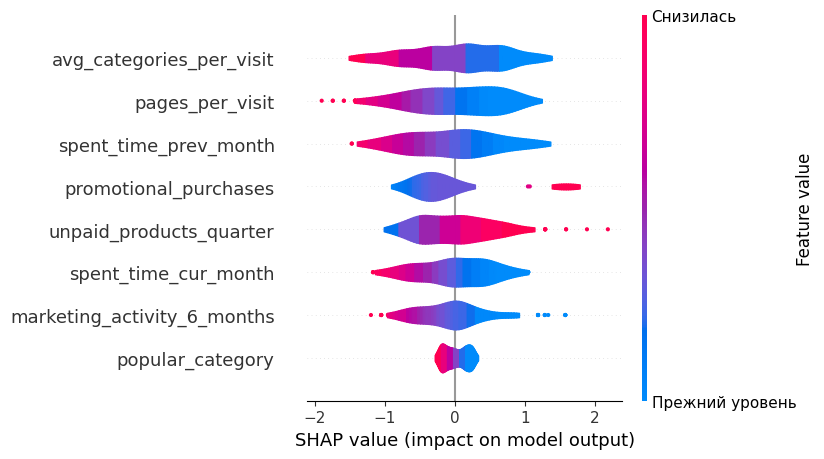

In [59]:
X_test_transformed = rfecv_logreg.transform(X_test)
final_feature_names = np.array(rfecv_logreg.get_feature_names_out())
explainer = shap.LinearExplainer(rfecv_logreg.named_steps['model'].estimator_,
                                 shap.maskers.Independent(X_test_transformed), 
                                 feature_names=final_feature_names)
shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values,
                  X_test_transformed,
                  feature_names=final_feature_names,
                  plot_type='violin')

- На изображении можно наблюдать все признаки, отобранные RFECV, и их качество по мнению shap
- Важными для логистической регресии являются признаки ```avg_categories_per_visit```, ```pages_per_visit``` и ```spent_time_prev_month```
- При этом эти признаки обратнопропопрциональны таргету. Также их распределение равномерно и не близко к 0, что показывает их большое качество.
- Прямопропорционально таргету являются признаки ```promotional_purchases``` и ```unpaid_products_quarter```, что вполне логично.

 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:

 
 

beeswarm построен, теперь надо его проанализировать,  ведь он нам подсказывает направление связи между признаками и таргетом


(Только чтобы правильно ответить на вопрос увеличения признака как связан с таргетом, нам нужно выяснить что закодировано нулём а что закодированы единицей)


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Покапался в shap и получилось поменять надписи LOW и HIGH на мои значения.
</div>

_____
### <a id='toc1_8_5_'></a>[Дерево решений](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_5_1_'></a>[Подбор гиперпараметров](#toc0_)

In [60]:
pipeline = get_pipepline_clf(
    feature_selection='RFECV',
    numerical_columns=market.select_dtypes(include='number').columns,
    categorical_columns=['popular_category'],
    categorical_ordered_columns=['service_type', 'allow_notifications']
)

model_params_cat = {'model__estimator': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
                    'model__estimator__criterion': ['gini', 'entropy', 'log_loss'],
                    'model__estimator__splitter': ['best', 'random']}
model_params_num = {
    'model__estimator__max_depth': lambda trial: trial.suggest_int('model__estimator__max_depth', 3, 40),
    'model__estimator__min_samples_split': lambda trial: trial.suggest_int('model__estimator__min_samples_split', 2, 20),
    'model__estimator__min_samples_leaf': lambda trial: trial.suggest_int('model__estimator__min_samples_leaf', 1, 10)
}

study_tree = optuna.create_study(direction='maximize')

In [61]:
%%time
study_tree.optimize(objective, n_trials=300, show_progress_bar=True)

Best trial: 76. Best value: 0.87828: 100%|██████████| 300/300 [07:04<00:00,  1.41s/it]

CPU times: total: 1min 28s
Wall time: 7min 4s


In [62]:
print(f'Best ROC AUC: {study_tree.best_value:.3f}')
best_params = get_best_params(study_tree.best_params)
print('\nBest parameters:')
pprint(best_params)

Best ROC AUC: 0.878

Best parameters:
{'model__estimator': DecisionTreeClassifier(random_state=42),
 'model__estimator__criterion': 'log_loss',
 'model__estimator__max_depth': 26,
 'model__estimator__min_samples_leaf': 9,
 'model__estimator__min_samples_split': 14,
 'model__estimator__splitter': 'random',
 'preprocessor__categorical__encoder': JamesSteinEncoder(handle_missing='return_nan', handle_unknown='return_nan',
                  random_state=42),
 'preprocessor__categorical__imputer': KNNImputer(),
 'preprocessor__categorical__scaler': StandardScaler(),
 'preprocessor__categorical_ordered__encoder': JamesSteinEncoder(handle_missing='return_nan', handle_unknown='return_nan',
                  random_state=42),
 'preprocessor__categorical_ordered__imputer_after': KNNImputer(),
 'preprocessor__categorical_ordered__imputer_before': SimpleImputer(strategy='most_frequent'),
 'preprocessor__categorical_ordered__scaler': StandardScaler(),
 'preprocessor__numerical__imputer': IterativeIm

*Важность признаков судя по перебору*

In [63]:
plot_param_importances(study_tree)

- Самым влиятельным для модели гиперпараметром является ```preprocessor__categorical_ordered__encoder```
- Менее влиятельными, но тоже важными можно считать ```preprocessor__catatigorical__encoder``` и ```model__estimator__splitter```

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_5_2_'></a>[Feature Engineering](#toc0_)

*Обучим модель на лучших параметрах*

In [64]:
rfecv_tree = clone(pipeline).set_params(**best_params)
rfecv_tree.fit(X_train, y_train.cat.codes)
rfecv_tree

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(estimator=DecisionTreeRegressor(random_state=42))),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['marketing_activity_6_months', 'current_month_marketing_activity',
       'registration_duration', 'promotional_purchases',
       'avg_categories_per_visit', 'un...
                                                                  ('imputer_after',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['service_type',
                                                   'allow_notifications'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 RFECV(cv=5,
                       estimator=DecisionTreeClassifier(criterion='log_loss',
                                                        max_depth=26,
                                                        min_samples_leaf=9,
                                                        min_samples_split=14,
                                                        random_state=42,
                                                        splitter='random'),
                       min_features_to_select=2, n_jobs=5,
                       scoring='roc_auc'))])

*График зависимости качества модели от количества признаков*

In [65]:
feature_selection_perfomance(rfecv_logreg.named_steps['model'].cv_results_,
                             rfecv_tree.named_steps['model'].cv_results_,
                             model_names=['Логистическая регрессия',
                                          'Дерево решений'])

In [66]:
rfecv_tree.get_feature_names_out()

array(['marketing_activity_6_months', 'registration_duration',
       'promotional_purchases', 'avg_categories_per_visit',
       'unpaid_products_quarter', 'pages_per_visit',
       'revenue_preprev_month', 'spent_time_prev_month',
       'spent_time_cur_month', 'popular_category', 1], dtype=object)

- RFECV по итогу отобрал всего 11 признаков
- Качество на тестовой выборке составило ROC AUC = 0.878
- Однако это модель очень нестабильна относительно признаков, на графике зависимости можно наблюдать сразу 4 пика, что говорит о возможном недообучении.

*Интерпретация важности признаков через shap*

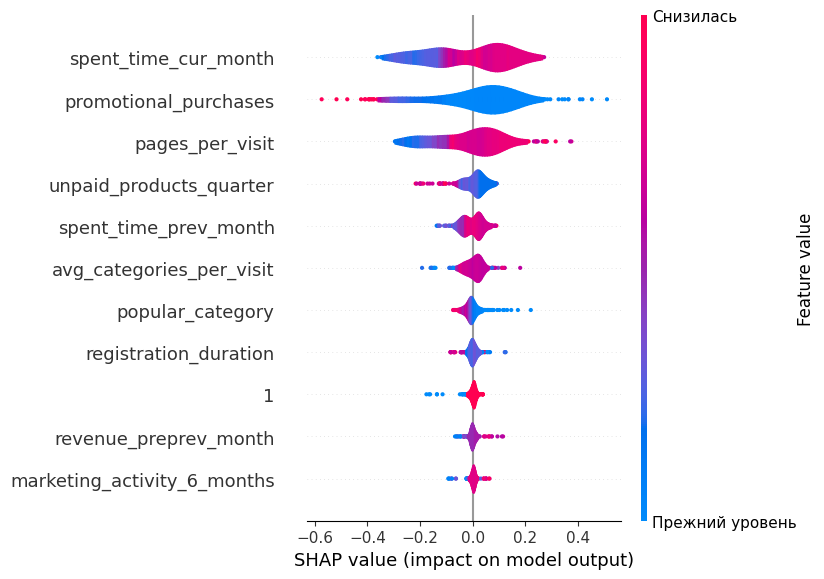

In [67]:
X_test_transformed = rfecv_tree.transform(X_test)
final_feature_names = np.array(rfecv_tree.get_feature_names_out())
explainer = shap.TreeExplainer(rfecv_tree.named_steps['model'].estimator_, feature_names=final_feature_names)
shap_values = explainer.shap_values(X_test_transformed)[:, :, 0]
shap.summary_plot(shap_values, X_test_transformed, feature_names=final_feature_names, plot_type='violin')

- Наблюдается очень большое кол-во фичей, распределение которых очень близко к 0, что говорит о их крайне малом вкладе в ответ модели.
- Самой влиятельной фичой является ```spent_time_cur_month```, который прямоопропорционален таргету (что вполне логично)
- Также влиятельными считаются признаки ```promotional_purchases``` (обратнопропорционально), ```pages_per_visit``` (прямопропорционально) и ```unpaid_products_quarter``` (обратнопропорционально).
- Распределение вышеперечисленных признаков равномерно и вправо, и влево, а также достаточно амплитудно, что есть хорошо.

_____
### <a id='toc1_8_6_'></a>[KNN](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_6_1_'></a>[Подбор гиперпараметров](#toc0_)

In [68]:
pipeline = get_pipepline_clf(
    feature_selection='SelectKBest',
    numerical_columns=market.select_dtypes(include='number').columns,
    categorical_columns=['popular_category'],
    categorical_ordered_columns=['service_type', 'allow_notifications']
)

model_params_cat = {'model': [KNeighborsClassifier()],
                    'model__weights': ['uniform', 'distance']}
model_params_num = {
    'model__n_neighbors': lambda trial: trial.suggest_int('model__n_neighbors', 3, 100),
    'feature_selection__k': lambda trial: trial.suggest_int('feature_selection__k', 2, X_train.shape[1]),
}

study_knn = optuna.create_study(direction='maximize')

In [69]:
%%time
study_knn.optimize(objective, n_trials=300, show_progress_bar=True)

Best trial: 113. Best value: 0.923276: 100%|██████████| 300/300 [03:30<00:00,  1.43it/s]

CPU times: total: 54.8 s
Wall time: 3min 30s


In [70]:
print(f'Best ROC AUC: {study_knn.best_value:.3f}')
best_params = get_best_params(study_knn.best_params)
print('\nBest parameters:')
pprint(best_params)

Best ROC AUC: 0.923

Best parameters:
{'feature_selection__k': 8,
 'model': KNeighborsClassifier(),
 'model__n_neighbors': 72,
 'model__weights': 'distance',
 'preprocessor__categorical__encoder': MEstimateEncoder(handle_missing='return_nan', handle_unknown='return_nan',
                 random_state=42),
 'preprocessor__categorical__imputer': SimpleImputer(strategy='most_frequent'),
 'preprocessor__categorical__scaler': StandardScaler(),
 'preprocessor__categorical_ordered__encoder': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=nan),
 'preprocessor__categorical_ordered__imputer_after': SimpleImputer(strategy='most_frequent'),
 'preprocessor__categorical_ordered__imputer_before': SimpleImputer(strategy='most_frequent'),
 'preprocessor__categorical_ordered__scaler': MinMaxScaler(),
 'preprocessor__numerical__imputer': IterativeImputer(estimator=DecisionTreeRegressor(random_state=42)),
 'preprocessor__numerical__scaler': MinMaxScaler()}


*Важность признаков судя по перебору*

In [71]:
plot_param_importances(study_knn)

- Наиболее значимым гиперпараметром считается ```feature_selection__k```
- Также стоит отметить вклад параметров ```preprocessor__categorical_ordered__encoder```, ```preprocessor__categorical__encoder```, ```preprocessor__categorical__scaler```

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_6_2_'></a>[Feature Engineering](#toc0_)

*Обучим модель на лучших параметрах*

In [72]:
knn = clone(pipeline).set_params(**best_params)
knn.fit(X_train, y_train.cat.codes)
knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(estimator=DecisionTreeRegressor(random_state=42))),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['marketing_activity_6_months', 'current_month_marketing_activity',
       'registration_duration', 'promotional_purchases',
       'avg_categories_per_visit', 'un...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('imputer_after',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['service_type',
                                                   'allow_notifications'])],
                                   verbose_feature_names_out=False)),
                ('feature_selection', SelectKBest(k=8)),
                ('model',
                 KNeighborsClassifier(n_neighbors=72, weights='distance'))])

In [73]:
feature_selection_perfomance(rfecv_logreg.named_steps['model'].cv_results_,
                             rfecv_tree.named_steps['model'].cv_results_,
                             study_knn.trials_dataframe().groupby('params_feature_selection__k')['value'].max(),
                             model_names=['Логистическая регрессия', 'Дерево решений', 'KNN'])

- ROC AUC на тестовой выборке составляет 0.923
- Модель показывает лучшие результаты на 8 признаках
- Можно заметить, что модель после пика идет по нисходящей, видимо из-за переобучения

_____
### <a id='toc1_8_7_'></a>[Метод опорных векторов](#toc0_)

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_7_1_'></a>[Подбор гиперпараметров](#toc0_)

In [74]:
pipeline = get_pipepline_clf(
    feature_selection='SelectKBest',
    numerical_columns=market.select_dtypes(include='number').columns,
    categorical_columns=['popular_category'],
    categorical_ordered_columns=['service_type', 'allow_notifications']
)

model_params_cat = {'model': [SVC(random_state=RANDOM_STATE)],
                    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
model_params_num = {
    'model__C': lambda trial: trial.suggest_float('model__C', 1e-3, 1e3, log=True),
    'model__gamma': lambda trial: trial.suggest_float('model__gamma', 1e-3, 1, log=True),
    'model__degree': lambda trial: trial.suggest_int('model__degree', 2, 4),
    'model__coef0': lambda trial: trial.suggest_float('model__coef0', 0.0, 10.0),
    'feature_selection__k': lambda trial: trial.suggest_int('feature_selection__k', 2, X_train.shape[1]),
}

study_svc = optuna.create_study(direction='maximize')

In [75]:
%%time
study_svc.optimize(objective, n_trials=300, show_progress_bar=True, timeout=900)

Best trial: 243. Best value: 0.910331: 100%|██████████| 300/300 [03:29<00:00,  1.43it/s, 209.65/900 seconds]

CPU times: total: 42.4 s
Wall time: 3min 29s


In [76]:
print(f'Best ROC AUC: {study_svc.best_value:.3f}')
best_params = get_best_params(study_svc.best_params)
print('\nBest parameters:')
pprint(best_params)

Best ROC AUC: 0.910

Best parameters:
{'feature_selection__k': 9,
 'model': SVC(random_state=42),
 'model__C': 348.28452107009235,
 'model__coef0': 5.860687845290667,
 'model__degree': 3,
 'model__gamma': 0.001283511843946616,
 'model__kernel': 'rbf',
 'preprocessor__categorical__encoder': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
 'preprocessor__categorical__imputer': SimpleImputer(strategy='most_frequent'),
 'preprocessor__categorical__scaler': StandardScaler(),
 'preprocessor__categorical_ordered__encoder': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=nan),
 'preprocessor__categorical_ordered__imputer_after': SimpleImputer(strategy='most_frequent'),
 'preprocessor__categorical_ordered__imputer_before': SimpleImputer(strategy='most_frequent'),
 'preprocessor__categorical_ordered__scaler': StandardScaler(),
 'preprocessor__numerical__imputer': IterativeImputer(estimator=DecisionTreeRegressor(random_state=42)),
 'preprocessor__numeri

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_8_7_2_'></a>[Feature Engineering](#toc0_)

*Важность признаков судя по перебору*

In [77]:
plot_param_importances(study_svc)

- Наиболее значимыми признакоми считаются ```model__gamma```, ```model__kernel``` и ```preprocessor__categorical_ordered__inputer_after```
- Также стоит отметить важные признаки ```preprocessor__categorical_ordered__encoder```, ```feature_selection__k```,  ```preprocessor__categorical__encoder```

*Обучим модель на лучших параметрах*

In [78]:
svc = clone(pipeline).set_params(**best_params)
svc.fit(X_train, y_train.cat.codes)
svc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(estimator=DecisionTreeRegressor(random_state=42))),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['marketing_activity_6_months', 'current_month_marketing_activity',
       'registration_duration', 'promotional_purchases',
       'avg_categories_per_visit', '...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('imputer_after',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['service_type',
                                                   'allow_notifications'])],
                                   verbose_feature_names_out=False)),
                ('feature_selection', SelectKBest(k=9)),
                ('model',
                 SVC(C=348.28452107009235, coef0=5.860687845290667,
                     gamma=0.001283511843946616, random_state=42))])

In [79]:
feature_selection_perfomance(rfecv_logreg.named_steps['model'].cv_results_,
                             rfecv_tree.named_steps['model'].cv_results_,
                             study_knn.trials_dataframe().groupby('params_feature_selection__k')['value'].max(),
                             study_svc.trials_dataframe().groupby('params_feature_selection__k')['value'].max(),
                             model_names=['Логистическая регрессия', 'Дерево решений', 'KNN', 'Метод опорных векторов'])

- Результаты топ модели на тестововой выборке составляет 0.910
- Лучший результат модель показывает на 12 фичах, после чего модель выходит на плато.

_____
### <a id='toc1_8_8_'></a>[Вывод](#toc0_)


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

А вот тут, в самом конце,  выбрав лучшую модель на валидации, проверяем ее на тестовом датасете - делаем финальное тестирование. И если лучшая модель выбранная на валидационной покажет на test результат хуже требуемого, мы начнем процесс моделирования сначала (а не будем такие - "а давай попробуем на тесте модель которая на валидации не была лучшей, может она нам на test даст нужное качество").         
    
Почему только лучшая?! Это делается для того, чтобы мы даже незначительным образом не "подгонялись" под тестовую выборку. Ведь на train модели обучаются, по валидиации подгоняются гиперпараметры. Эти данные модели "знают". А test (out-of-sample) это уже моделирование прогноза на реальных данных и ситуации когда у нас есть уже лучшая модель (в рельности у нас же не может быть несоклько прогнозов, что то в любом случаи надо выбирать). Вот поэтому такая двухуровневая проверка на подгонку. Кроме того использование мноих моделей с разными гиперпараметрами это тоже подгонка, поэтому выбирая одну и тестируя только ее, мы тем самым боремся с подгонкой через использование многих-многих моделей, когда результат хорош не потому что мы данные почистили хорошо, моделировали правильно итд итп, а потому что из многих моделей хоть какая то случайно "сыграет". 

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Исправил
</div>

In [80]:
feature_selection_perfomance(rfecv_logreg.named_steps['model'].cv_results_,
                             rfecv_tree.named_steps['model'].cv_results_,
                             study_knn.trials_dataframe().groupby('params_feature_selection__k')['value'].max(),
                             study_svc.trials_dataframe().groupby('params_feature_selection__k')['value'].max(),
                             model_names=['Логистическая регрессия', 'Дерево решений', 'KNN', 'Метод опорных векторов'])

*Лучше всех на валидации показала себя модель KNN. Посмотрим ее качество на тестовой выборке*

In [81]:
print(f'ROC AUC KNN на тестовой выборки = {roc_auc_score(y_test.cat.codes, knn.predict_proba(X_test)[:, 1]):.3f}')

ROC AUC KNN на тестовой выборки = 0.921


- Хороший результат, возьмем эту модель как итоговую

In [82]:
knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(estimator=DecisionTreeRegressor(random_state=42))),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['marketing_activity_6_months', 'current_month_marketing_activity',
       'registration_duration', 'promotional_purchases',
       'avg_categories_per_visit', 'un...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('imputer_after',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['service_type',
                                                   'allow_notifications'])],
                                   verbose_feature_names_out=False)),
                ('feature_selection', SelectKBest(k=8)),
                ('model',
                 KNeighborsClassifier(n_neighbors=72, weights='distance'))])

*Отобранные моделью признаки*

In [83]:
knn.named_steps['preprocessor'].get_feature_names_out()[knn.named_steps['feature_selection'].get_support()]

array(['marketing_activity_6_months', 'promotional_purchases',
       'avg_categories_per_visit', 'unpaid_products_quarter',
       'pages_per_visit', 'revenue_preprev_month',
       'spent_time_prev_month', 'spent_time_cur_month'], dtype=object)

_____
### Вывод:

1. Логистическая регрессия
- Показала стабильные результаты.
- Лучший ROC AUC составил 0.899.
- Логистическая регрессия показала устойчивость к уменьшению числа признаков, сохраняя высокое качество при 8 признаках.
- Легко интерпретируемая модель, что является значимым фактором для бизнеса.

2. Дерево решений
- Продемонстрировало хороший результат (ROC AUC = 0.878) при использовании большого количества признаков (11).
- Сильно уступает логистической регрессии в стабильности качества.

3. K-Nearest Neighbors (KNN)
- Достиг максимального ROC AUC 0.923 (лучший результат) + аналогичный результат и на тестовой выборке (0.921).
- Модель легко интерпретируема, что важно для бизнеса.

4. Метод опорных векторов (SVC)
- Наивысший ROC AUC составил 0.910, однако показала менее нестабильное поведение при разном количестве признаков.
- Модель менее интерпретируема, а качество на малом числе признаков нестабильно, что усложняет применение в реальных условиях.


<hr style="border: none; border-top: 2px dashed;">

- Итоговая модель: KNN
    
    Выбор итоговой модели обусловлен следующими причинами:
    - Интерпретируемость: Позволяет легко понять значимость отдельных признаков и их влияние на целевую переменную, что важно для принятия решений в бизнесе.
    - Качество: Лучшее среди обученных моделей.

  
    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- есть график важности факторов, график аккуратный
    
    
- есть выводы о том, какие факторы сильнее/слабее влияют
    
	
- плюс за использование .beeswarm,  ведь он даёт гораздо больше информации    
    
     


_____
_____
## <a id='toc1_9_'></a>[Сегментация покупателей](#toc0_)

Для чистоты анализа возьмем тестовую выборку для анализа. Добавим в нее предсказания выбранной модели. Также добавим к нашему датасету данные из таблицы ```money```.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


Не нашел где была сделана проверка что .predict_proba(X_test)[:, 0], это вероятность "снизилась". Лучше Это явно показать 
 

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Исправил
</div>

In [84]:
y_test

id
216161    Прежний уровень
215654          Снизилась
216307    Прежний уровень
215501          Снизилась
215934          Снизилась
               ...       
215429          Снизилась
216233    Прежний уровень
215716          Снизилась
216141    Прежний уровень
215670          Снизилась
Name: customer_activity, Length: 324, dtype: category
Categories (2, object): ['Прежний уровень' < 'Снизилась']

- ```Снизилась``` = 1
- ```Прежний уровень``` = 0

In [85]:
segmentation = X_test.copy()
segmentation = segmentation.merge(money, on='id')
segmentation['probability_of_decrease'] = knn.predict_proba(X_test)[:, 1]
segmentation['customer_activity'] = y_test.cat.codes
market_columns_translate.update({'Прибыль': 'profit', 'Вероятность снижения покупательской активности': 'probability_of_decrease'})
segmentation.head()

,service_type,allow_notifications,marketing_activity_6_months,current_month_marketing_activity,registration_duration,promotional_purchases,popular_category,avg_categories_per_visit,unpaid_products_quarter,service_errors,pages_per_visit,revenue_preprev_month,revenue_prev_month,revenue_cur_month,spent_time_prev_month,spent_time_cur_month,profit,probability_of_decrease,customer_activity
id,,,,,,,,,,,,,,,,,,,
216161,стандарт,да,4.1,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,4912,3973,3289,16,17,4690,0.058119,0
215654,премиум,нет,1.4,4,684,0.94,Товары для детей,3,6,1,6,4656,3548,4170,11,9,2750,0.943585,1
216307,премиум,да,3.3,4,488,0.13,Домашний текстиль,4,2,8,10,4565,5444,6335,20,11,3160,0.140507,0
215501,премиум,да,3.5,3,1057,0.35,Домашний текстиль,4,3,5,6,4993,6604,6758,9,9,3740,0.680298,1
215934,стандарт,нет,5.5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,4451,5090,5773,15,18,4400,0.729238,1


In [86]:
statistical_graphis_for_numeric(segmentation.probability_of_decrease,
                                axis_title=market_columns_translate.inverse['probability_of_decrease'],
                                nbinsx=40)

- Видно, что распределение двумодельное. Второй горб описывает клиентов, склонных на снижение покупательской активности. Можно однозначно сказать, что есть явная причина, по которой часть клиентов уходят, приэтом другую часть покупателей это не задело. 

### <a id='toc1_9_1_'></a>[Категории для сегментации](#toc0_)

<img src="https://pictures.s3.yandex.net/resources/image_1695485033.png" width="1000"/>

In [87]:
color_palette = cycle(px.colors.qualitative.Plotly)


def pieplot_grouped_by_customer_activity(data: pd.DataFrame, column, top_n_in_pie=5):
    """
    Функция для построения двух круговых диаграмм, показывающих распределение значений категориального столбца
    для двух групп данных: с уменьшенной активностью и с сохраненной активностью.

    Группировка данных происходит по значениям в колонке `customer_activity`, где:
    - `0` — означает снижение активности.
    - `1` — означает сохранение прежнего уровня активности.

    На каждой диаграмме отображаются топ-N категорий для выбранного столбца с категорией "Остальные" для оставшихся значений.

    Parameters
    ----------
    data : pd.DataFrame
        Входные данные в виде DataFrame, содержащие колонку `customer_activity` и категориальный столбец `column`, для которого строятся диаграммы.
    
    column : str
        Имя категориальной колонки, для которой строятся круговые диаграммы. Эта колонка должна быть частью DataFrame.
    
    top_n_in_pie : int, по умолчанию 5
        Количество топ-N категорий, которые будут отображены на каждой диаграмме. Остальные категории будут объединены в одну категорию "Остальные".
    """ 
    fig = make_subplots(
        rows=1, cols=2, specs=[[ {'type': 'domain'}, {'type': 'domain'}]],
        subplot_titles=('Уровень активности снизился', 'Прежний уровень активности')
    )
    
    category_agg = data[data.customer_activity == 0][column].value_counts()
    other = [category_agg[top_n_in_pie:].sum()]
    fig.add_trace(
        go.Pie(labels=category_agg.head(top_n_in_pie).index.tolist() + (['Остальные'] if other[0] else []),
               values=category_agg.head(top_n_in_pie).values.tolist() + (other if other[0] else []),
               name='',
               textinfo='label+percent'),
        row=1, col=1
    )
    
    category_agg = data[data.customer_activity == 1][column].value_counts()
    other = [category_agg[top_n_in_pie:].sum()]
    fig.add_trace(
        go.Pie(labels=category_agg.head(top_n_in_pie).index.tolist() + (['Остальные'] if other[0] else []),
               values=category_agg.head(top_n_in_pie).values.tolist() + (other if other[0] else []),
               name='',
               textinfo='label+percent'),
        row=1, col=2
    )

    fig.update_layout(
        title_text=f'Круговые диаграммы по колонке <b>{market_columns_translate.inverse[column]}</b><br>(<b>{column}</b>)',
        title_x=0.5,
        showlegend=True,
        width=1200,
        height=600,
    )

    fig.show()


def histogram_grouped_by_customer_activity(data: pd.DataFrame, column, nbinsx):
    """
    Функция для построения гистограмм, показывающих распределение значений числовой колонки
    для двух групп данных: с уменьшенной активностью и с сохраненной активностью.

    Группировка данных происходит по значениям в колонке `customer_activity`, где:
    - `0` — означает снижение активности.
    - `1` — означает сохранение прежнего уровня активности.

    Строятся две гистограммы, каждая для одной из групп с указанием частоты значений для выбранного столбца.

    Parameters
    ----------
    data : pd.DataFrame
        Входные данные в виде DataFrame, содержащие колонку `customer_activity` и числовой столбец `column`, для которого строятся гистограммы.
    
    column : str
        Имя числовой колонки, для которой строятся гистограммы. Эта колонка должна быть частью DataFrame.
    
    nbinsx : int
        Количество корзин (бин) для гистограммы.
    """
    data_class_0 = data[data.customer_activity == 0][column]
    data_class_1 = data[data.customer_activity == 1][column]

    fig = go.Figure()

    fig.add_trace(
        go.Histogram(
            x=data_class_0,
            name='Уровень активности снизился',
            opacity=0.5,
            marker=dict(color='blue'),
            nbinsx=nbinsx
        )
    )

    fig.add_trace(
        go.Histogram(
            x=data_class_1,
            name='Прежний уровень активности',
            opacity=0.5,
            marker=dict(color='orange'),
            nbinsx=nbinsx
        )
    )

    fig.update_layout(
        title_text=f'Гистограммы по колонке <b>{market_columns_translate.inverse[column]}</b><br>(<b>{column}</b>)',
        xaxis_title=column,
        yaxis_title='Частота',
        barmode='overlay',
        legend=dict(title="Класс активности"),
        width=900,
        height=500
    )

    fig.show()


def draw_scatter_between_probability_of_decrease_and(data: pd.DataFrame, num_col, cat_cols, opacity=0.4, rows=2, cols=2, height=1200, width=1200):
    """
    Функция для построения диаграмм рассеяния между вероятностью снижения активности 
    и числовым столбцом, разбитым по классам категориальных признаков.

    Для каждого категориального признака (из списка `cat_cols`) строится диаграмма рассеяния 
    для каждого уникального значения категории, а также линия тренда для каждой группы. 
    Также отображается общая линия тренда для всего датасета.

    Parameters
    ----------
    data : pd.DataFrame
        Входные данные в виде DataFrame, содержащие как минимум два столбца:
        - числовой столбец `num_col`, по которому строится график.
        - колонка с вероятностью снижения активности `probability_of_decrease`.
        - Набор категориальных признаков для группировки.
    
    num_col : str
        Имя числового столбца в DataFrame, для которого строится диаграмма рассеяния.

    cat_cols : list[str]
        Список категориальных признаков, по которым будет выполняться группировка данных 
        и строиться отдельная диаграмма рассеяния.

    opacity : float, по умолчанию 0.4
        Степень прозрачности точек на графике (от 0 до 1).

    rows : int, по умолчанию 2
        Количество строк для размещения графиков в сетке.

    cols : int, по умолчанию 2
        Количество столбцов для размещения графиков в сетке.

    height : int, по умолчанию 1200
        Высота итогового графика в пикселях.

    width : int, по умолчанию 1200
        Ширина итогового графика в пикселях.
    """
    fig = make_subplots(
        rows=rows, cols=cols, vertical_spacing=0.09,
        subplot_titles=[market_columns_translate.inverse[col] for col in data.select_dtypes(include='object').columns]
    )

    for cetegoty_i, category_col in enumerate(cat_cols):
        # Перебор категориальных признаков

        for class_of_category, group_of_category in data.groupby(category_col):
            # Перебор по каждому классу категории

            color = next(color_palette)
            x = group_of_category[num_col]
            y = group_of_category['probability_of_decrease']

            # диаграмма рассеяния по классу
            fig.add_trace(
                go.Scatter(
                    x=x,
                    y=y,
                    mode='markers',
                    marker=dict(size=7, opacity=opacity, color=color),
                    name=class_of_category,
                    legendgroup=market_columns_translate.inverse[category_col],
                    legendgrouptitle=dict(text=market_columns_translate.inverse[category_col]),
                ),
                row=cetegoty_i // cols + 1, col=cetegoty_i % cols + 1
            )
            slope, intercept = np.polyfit(x, y, 1)
            trend_line = slope * x + intercept

            # Линия тренда по классу
            fig.add_trace(
                go.Scatter(
                    x=x,
                    y=trend_line,
                    mode='lines',
                    line=dict(
                        color=f'rgb{find_intermediate_color(hex_to_rgb(color), [0] * 3, 0.4)}',
                        width=3
                    ),
                    name='Линия тренда',
                    visible='legendonly',
                    legendgroup=market_columns_translate.inverse[category_col],
                ),
                row=cetegoty_i // cols + 1, col=cetegoty_i % cols + 1
            )

        # Общая линия тренда
        slope, intercept = np.polyfit(data[num_col], data.probability_of_decrease, 1)
        trend_line = slope * data[num_col] + intercept
        fig.add_trace(
            go.Scatter(
                x=data[num_col],
                y=trend_line,
                mode='lines',
                name='Общая линия тренда',
                visible='legendonly',
                line=dict(color='black', width=3),
                legendgroup=market_columns_translate.inverse[category_col],
            ),
            row=cetegoty_i // 2 + 1, col=cetegoty_i % 2 + 1
        )
        fig.update_xaxes(title_text=market_columns_translate.inverse[num_col], row=cetegoty_i // 2 + 1, col=cetegoty_i % 2 + 1)
        fig.update_yaxes(title_text=market_columns_translate.inverse['probability_of_decrease'], row=cetegoty_i // 2 + 1, col=cetegoty_i % 2 + 1)

    title=(f'Диаграммы рассеяния между признаками <b>Вероятность снижения активности</b><br>и <b>{market_columns_translate.inverse[num_col]}</b>,' +
           f'разбитые по классам категориальных признаков<br>corr={data.probability_of_decrease.corr(data[num_col]):.3f}')
    fig.update_layout(
        title=title,
        title_y=0.98,
        title_x=0.5,
        height=height,
        width=width,
        legend=dict(
            traceorder='grouped',
            groupclick='toggleitem',
        ),
    )
    fig.show()

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_9_1_1_'></a>[Коммуникация с клиентом](#toc0_)

In [88]:
communication  = segmentation[['service_type', 'allow_notifications', 'marketing_activity_6_months', 'current_month_marketing_activity', 'registration_duration', 'probability_of_decrease', 'customer_activity']]
communication.head()

,service_type,allow_notifications,marketing_activity_6_months,current_month_marketing_activity,registration_duration,probability_of_decrease,customer_activity
id,,,,,,,
216161,стандарт,да,4.1,4,606,0.058119,0
215654,премиум,нет,1.4,4,684,0.943585,1
216307,премиум,да,3.3,4,488,0.140507,0
215501,премиум,да,3.5,3,1057,0.680298,1
215934,стандарт,нет,5.5,4,147,0.729238,1


In [89]:
cat_cols = ['service_type', 'allow_notifications', 'current_month_marketing_activity']
for cat_col in ['service_type', 'allow_notifications', 'current_month_marketing_activity']:
    pieplot_grouped_by_customer_activity(communication, cat_col)

- По круговой диаграмме ```Тип сервиса``` видно, что покупатальская активность снизилась больше у клиентов с типом сервиса премиум 

In [90]:
for num_col in ['marketing_activity_6_months', 'registration_duration']:
    histogram_grouped_by_customer_activity(communication, num_col, nbinsx=20)
    draw_scatter_between_probability_of_decrease_and(communication, num_col, cat_cols, rows=2, height=900)

- По гистограмме ```Маркет_актив_6_мес``` видно, что клиенты, которым было уделено меньше маркетингого привлечения, имеет спад поупательской активность (все логично).

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_9_1_2_'></a>[Продуктовое поведение](#toc0_)

In [91]:
product_behavior = segmentation[['popular_category', 'avg_categories_per_visit', 'unpaid_products_quarter', 'probability_of_decrease', 'customer_activity']]
product_behavior.head()

,popular_category,avg_categories_per_visit,unpaid_products_quarter,probability_of_decrease,customer_activity
id,,,,,
216161,Техника для красоты и здоровья,6,1,0.058119,0
215654,Товары для детей,3,6,0.943585,1
216307,Домашний текстиль,4,2,0.140507,0
215501,Домашний текстиль,4,3,0.680298,1
215934,Мелкая бытовая техника и электроника,1,2,0.729238,1


In [92]:
for cat_col in ['popular_category', 'unpaid_products_quarter']:
    pieplot_grouped_by_customer_activity(product_behavior, cat_col, top_n_in_pie=7)

- Видно, что из-за уменьшения продаж "Техника для красоты и здоровья" и "Мелкая бытовая техника и электроника" уменьшилась и покупательская активность. Вполне возможно что уменьшение продаж этих категорий напрямую связано с уменьшением поставок, следственно некоторые клиенты купили себе товары этой категории в других магазинах.

In [93]:
histogram_grouped_by_customer_activity(product_behavior, 'avg_categories_per_visit', nbinsx=20)
draw_scatter_between_probability_of_decrease_and(product_behavior, 'avg_categories_per_visit', ['popular_category', 'unpaid_products_quarter'], rows=1, height=650)

C:\Users\bezgr\AppData\Local\Temp\ipykernel_12900\1854356865.py:2: RankWarning:

Polyfit may be poorly conditioned

C:\Users\bezgr\AppData\Local\Temp\ipykernel_12900\1854356865.py:2: RankWarning:

Polyfit may be poorly conditioned



- Гистограмма подтверждает предыдущий вывод о нехватке ассортимента на полках магазина, так как видно, что клиент просмматривает меньшее кол-во категорий, из-за нехватки продукции.

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_9_1_3_'></a>[Поведение на сайте](#toc0_)

In [94]:
site_behavior = segmentation[
    ['spent_time_cur_month', 'spent_time_prev_month', 'pages_per_visit', 'service_errors', 'probability_of_decrease', 'customer_activity']
].merge((market_time.groupby('id')['minutes'].sum() / 2), on='id').rename(columns={'minutes': 'avg_minutes'})
site_behavior.head()

,spent_time_cur_month,spent_time_prev_month,pages_per_visit,service_errors,probability_of_decrease,customer_activity,avg_minutes
id,,,,,,,
216161,17,16,12,4,0.058119,0,16.5
215654,9,11,6,1,0.943585,1,10.0
216307,11,20,10,8,0.140507,0,15.5
215501,9,9,6,5,0.680298,1,9.0
215934,18,15,7,3,0.729238,1,16.5


In [95]:
for num_col in ['spent_time_cur_month', 'spent_time_prev_month', 'pages_per_visit', 'service_errors']:
    histogram_grouped_by_customer_activity(site_behavior, num_col, nbinsx=20)
    draw_scatter_between_probability_of_decrease_and(site_behavior, num_col, ['customer_activity'], opacity=0.7, rows=1, cols=1, height=650, width=900)

- На данных гистограммах можно отчетливо увидеть, что время, проведенное на сайте упало у клиентов с низким уровнем активности. С одной стороны это поледствие уменьшение активности, однако такую природу гистограмм можно описать и с другой стороны, к примеру: Пользователь не нашел нужных товаров, поэтому пошел искать в другой магазин.

<hr style="border: none; border-top: 3px dashed;">

#### <a id='toc1_9_1_4_'></a>[Финансовое поведение](#toc0_)

In [96]:
financial_behavior = segmentation[['revenue_cur_month', 'probability_of_decrease', 'customer_activity']]
financial_behavior['revenue_diff_cur_prev_month'] = X_test['revenue_cur_month'] - X_test['revenue_prev_month']
financial_behavior['revenue_diff_prev_preprev_month'] = X_test['revenue_prev_month'] - X_test['revenue_preprev_month']
financial_behavior.head()

C:\Users\bezgr\AppData\Local\Temp\ipykernel_12900\3328554826.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bezgr\AppData\Local\Temp\ipykernel_12900\3328554826.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,revenue_cur_month,probability_of_decrease,customer_activity,revenue_diff_cur_prev_month,revenue_diff_prev_preprev_month
id,,,,,
216161,3289,0.058119,0,-684,-939
215654,4170,0.943585,1,622,-1108
216307,6335,0.140507,0,891,879
215501,6758,0.680298,1,154,1611
215934,5773,0.729238,1,683,639


In [97]:
market_columns_translate.update({'Разница в выручке между текущим и прошлым месяцами': 'revenue_diff_cur_prev_month', 'Разница в выручке между прошлым и позапрошлым месяцями': 'revenue_diff_prev_preprev_month'})

In [98]:
for num_col in ['revenue_cur_month', 'revenue_diff_cur_prev_month', 'revenue_diff_prev_preprev_month']:
    histogram_grouped_by_customer_activity(financial_behavior, num_col, nbinsx=40)
    draw_scatter_between_probability_of_decrease_and(financial_behavior, num_col, ['customer_activity'], opacity=0.7, rows=1, cols=1, height=650, width=900)

- Здесь мы можем наблюдать уменьшение выручки с клиентов, покупательская активность которых падает, это не причина, а следствие.

_____
### <a id='toc1_9_2_'></a>[Вывод](#toc0_)

1. **Сегментация покупателей**:
    - Распределение вероятности снижения покупательской активности имеет двумодальное распределение, что указывает на наличие двух различных групп клиентов.
    - Клиенты с типом сервиса "премиум" имеют более высокую вероятность снижения покупательской активности по сравнению с клиентами с типом сервиса "стандарт".
    - Клиенты, которым было уделено меньше маркетингового внимания за последние 6 месяцев, имеют более высокую вероятность снижения покупательской активности.

2. **Продуктовое поведение**:
    - Снижение покупательской активности связано с уменьшением продаж в категориях "Техника для красоты и здоровья" и "Мелкая бытовая техника и электроника".
    - Клиенты, которые просматривают меньшее количество категорий за визит, имеют более высокую вероятность снижения покупательской активности, что может указывать на нехватку ассортимента.

3. **Поведение на сайте**:
    - Клиенты с низким уровнем активности проводят меньше времени на сайте, что может быть как следствием, так и причиной снижения покупательской активности.
    - У клиентов с низким уровнем активности также наблюдается меньшее количество страниц за визит и большее количество ошибок сервиса.

4. **Финансовое поведение**:
    - Снижение покупательской активности сопровождается уменьшением выручки от клиентов, что является следствием снижения их активности.
    - Клиенты с высокой вероятностью снижения покупательской активности показывают отрицательную динамику выручки за последние месяцы.

- ***Предложения бизнесу***
1. **Увеличение маркетинговой активности**:
    - **Причина**: Анализ показал, что клиенты с низкой маркетинговой активностью за последние 6 месяцев имеют более высокую вероятность снижения покупательской активности.
    - **Предложение**: Увеличить количество маркетинговых кампаний, направленных на этот сегмент клиентов, с акцентом на персонализированные предложения и скидки.

2. **Оптимизация ассортимента товаров**:
    - **Причина**: Клиенты, которые просматривают меньшее количество категорий товаров, имеют более высокую вероятность снижения покупательской активности. Это может быть связано с нехваткой интересующих их товаров.
    - **Предложение**: Провести анализ ассортимента и увеличить наличие популярных категорий товаров, таких как "Техника для красоты и здоровья" и "Мелкая бытовая техника и электроника".

3. **Улучшение пользовательского опыта на сайте**:
    - **Причина**: Клиенты, которые проводят меньше времени на сайте и сталкиваются с ошибками сервиса, имеют более высокую вероятность снижения покупательской активности.
    - **Предложение**: Оптимизировать работу сайта, уменьшить количество ошибок сервиса и улучшить навигацию, чтобы пользователи могли легко находить интересующие их товары.

4. **Персонализированные уведомления**:
    - **Причина**: Клиенты, которые разрешили получать уведомления, имеют более высокую вероятность снижения покупательской активности.
    - **Предложение**: Персонализировать уведомления, чтобы они были более релевантными и интересными для клиентов, что может повысить их вовлеченность и активность.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Тут студент сам выбирает как проводить сегментацию, главное чтобы была логика и рассуждения.  С этим всё в порядке

 

<div class="alert alert-warning">


Совет 🤔:


- самый очевидный и наверное логичный вариант - это рассмотреть сегмент клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью. Тут сходится всё - и бизнесовая составляющая, и результаты моделирования мы используем). А в качестве контры-сегмента таких же прибыльных клиентов, но в отношении которых модель уверена что они активность сохранят.  а дальше проводим сравнение... А еще можно посмотреть на динамику выручки по месяцам, в группировке по категориальным признакам (популярная категория Товаров), возможно тут получится увидеть что то интересное и сделать какие то маркетинговые предложения. Отслеживание динамики, как и сравнение, отличный способ найти в данных что то интересное. Если посмотреть на выручки за разные месяцы в группировке по популярным товарам, то можно увидеть выручка по одной группе товаров сильно проседает
 

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Вроде как я и сделал что то аналогичное
</div>

_____
_____
## <a id='toc1_10_'></a>[Общий вывод](#toc0_)

**Модели**
1. **Логистическая регрессия**:
    - Показала стабильные результаты.
    - Лучший ROC AUC составил 0.892.
    - Логистическая регрессия показала устойчивость к уменьшению числа признаков, сохраняя высокое качество при 10 признаках.
    - Легко интерпретируемая модель, что является значимым фактором для бизнеса.
2. **Дерево решений**:
    - Продемонстрировало хороший результат (ROC AUC = 0.846) при использовании небольшого количества признаков (5).
    - Однако уступает логистической регрессии в стабильности качества.

3. **K-Nearest Neighbors (KNN)**:
    - Достиг максимального ROC AUC 0.904, но качество сильно варьировалось в зависимости от числа признаков, что указывает на нестабильность модели.

4. **Метод опорных векторов (SVC)**:
    - Наивысший ROC AUC составил 0.904, однако показала нестабильное поведение при разном количестве признаков.
    - Модель менее интерпретируема, а качество на малом числе признаков нестабильно, что усложняет применение в реальных условиях.

- **Логистическая регрессия** была выбрана в качестве итоговой модели по следующим причинам:
    - **Интерпретируемость**: Логистическая регрессия позволяет легко понять значимость отдельных признаков и их влияние на целевую переменную, что важно для принятия решений в бизнесе.
    - **Стабильность**: Модель показывает стабильно высокое качество независимо от числа используемых признаков, что делает ее надежным выбором.
    - **Качество**: Несмотря на немного более низкий ROC AUC по сравнению с KNN и SVC, разница не является критичной, а дополнительные преимущества интерпретируемости и устойчивости перевешивают.

**Предложения бизнесу**
1. **Увеличение маркетинговой активности**:
    - **Причина**: Анализ показал, что клиенты с низкой маркетинговой активностью за последние 6 месяцев имеют более высокую вероятность снижения покупательской активности.
    - **Предложение**: Увеличить количество маркетинговых кампаний, направленных на этот сегмент клиентов, с акцентом на персонализированные предложения и скидки.
2. **Оптимизация ассортимента товаров**:
    - **Причина**: Клиенты, которые просматривают меньшее количество категорий товаров, имеют более высокую вероятность снижения покупательской активности. Это может быть связано с нехваткой интересующих их товаров.
    - **Предложение**: Провести анализ ассортимента и увеличить наличие популярных категорий товаров, таких как "Техника для красоты и здоровья" и "Мелкая бытовая техника и электроника".
3. **Улучшение пользовательского опыта на сайте**:
    - **Причина**: Клиенты, которые проводят меньше времени на сайте и сталкиваются с ошибками сервиса, имеют более высокую вероятность снижения покупательской активности.
    - **Предложение**: Оптимизировать работу сайта, уменьшить количество ошибок сервиса и улучшить навигацию, чтобы пользователи могли легко находить интересующие их товары.
4. **Персонализированные уведомления**:
    - **Причина**: Клиенты, которые разрешили получать уведомления, имеют более высокую вероятность снижения покупательской активности.
    - **Предложение**: Персонализировать уведомления, чтобы они были более релевантными и интересными для клиентов, что может повысить их вовлеченность и активность.

 



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Григорий, здорово что в конце расписаны все этапы работы. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе.
 


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 
И если у тебя так хорошо с кодирование, вот тебе вопросы. Если интересно можешь поотвечать


  
 
- Почему метрика на тестовой выборке обычно выше чем на .best_score_ . И почему иногда она всё-таки оказывается ниже


- Можешь с помощью кода (или алгоритма), на примере дерева решений показать почему мы не используем метрику на тренировочной выборке чтобы подобрать  гиперпараметр max_depth



- От какого рандома позволяет избавиться кроссвалидация



- Можешь написать код (алгоритм) который бы повторял то что делает GridSearchCV внутри себя, начиная от разбиения на выборки и заканчивая обученим модели на лучших гиперпараметрах



- Можешь написать код (алгоритм) который бы повторял то что делает GridSearchCV + pipeline, если у нас в pipeline указан Scaler  наших количественных признаков/
если в pipeline указан SimpleImpute('most_frequent')



- Мы сделали 

        scaler = StandardScaler()
        scaler.fit(train_feat[numeric])
        feat_train[numeric] = scaler.transform(feat_train[numeric])
        feat_test[numeric] = scaler.transform(feat_test[numeric])

После чего используем GridSearchCV без pipeline. Будет ли происходить утечка данных и где 



- И другой вариант -   у нас нет предварительной обработки данных (Scaler не делаем, OHE не делаем, SimpleImpute вроде тоже не нужен, потому что пропусков нет итд), нужно ли использовать связку GridSearchCV + pipeline. А если да, то для чего pipeline может пригодиться? 
 


- Мы сделали 

        impute = SimpleImpute('mean')
        impute.fit(train_feat['Выручка'])
        feat_train['Выручка'] = impute.transform(feat_train['Выручка'])
        feat_test['Выручка'] = impute.transform(feat_test['Выручка'])

При этом средняя в столбце 'Выручка' 100 (Если взять вместе тренировочную и тестовую)
Средняя в столбце feat_train['Выручка'] 50
Средняя в столбце feat_test['Выручка'] 150

каким числом будет заполнены пропуски в feat_train['Выручка'] и feat_test['Выручка']

 

- Допустим у нас сильно несбалансированная выборка для задачи классификации (используем метрику f1). Чтобы   устранить дисбаланс,  мы предварительно балансируем нашу тренировочную выборку, тестовую оставляя как есть. Далее, используя GridSearchCV обучаем модель подбирая лучшие гиперпараметры.
И смотрим метрику по .best_score_ . А затем смотрим f1 на тестовой выборке.  Будут ли сильно отличаются метрики на тестовой и  .best_score_? Если будут, то в какую сторону и какие причины этому, и как это можно исправить? 



- Допустим ты хочешь заполнить пропуски по более сложной логике, чем предлагает SimpleImpute (Средней/наиболее часто встерчаемым значением в столбце) 
 ты хочешь  заполнить средней в группировке по какому-то категориальному значению
(Например  пропуск данных в выручке покупающих детские товары, ты хочешь заполнить средней по выручке покупающих детские товары, а пропуск в выручке покупающих косметику, хочшеь заполнить средней выручкой людей покупающих косметику).
Допустим даже написана функцию для заполнения пропусков таким образом. Сможешь ли ты добавить в свою функцию в pipeline, а если нет то что нужно с ней предварительно сделать



<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

- Во втором случае модель обучается на большем кол-ве данных (фолд не выделяется на валидацию). тест может быть хуже из за переобучения
- Получается переобучение из за подгонки к трейновой выборке
- от рандома разбиения (train_test_split). Может неудачно разбиться выборка на трейн и валидацию и из за небольшого кол-ва данных валидационной выборки метрики могут плохо отражать качество 
- ну я бе через какой нибудь инструмент itertools (типа combinations) перебирал параметры и проверял качество через cross_val_score ну и отдавал топ модель
- не понял задание
- в таком случае GridSearchCV отнормировал (обучил) данные для трейн и вал выборки вместе, поэтому кросс валидация полетит
- pipeline сам по себе удобный инструмент
- ну GridSearch понадобится для перебора других гиперпараметров, к примеру в модели. pipeline удобный инструмент, который легко редачить
- 50
- будут, так как модель оптимизирована под сбалансированные данные, она не адапатирована под реальные распределение, но такой подход более рациональный, так как мы сможем хоть как то определять минорный класс. не понял что надо исправить. с дисбалансом борятся по разному оверсемлинг андерсемплинг, class_weigth итд
- Кастомный трансформер BaseEstimator+TransformerMixin (точно не помню как называются)
</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Григорий, у тебя старательно выполненная работа, все четко, осмысленно. Очень солидный код, здорово Что использовал optuna, pipeline, plotly. Добавил много дополнительных инструментов в pipeline, учёба дисбаланс таргета. Всё это конечно выделяет тебя из общей массы студентов 



Выводы подробные, в конце разделов есть промежуточные выводы. 

Данный проект не только про моделирование, а даже больше про анализ.  Тут конечно надо было проявить логику и показать рассуждение в разделе сегментация, что тебе вполне удалось.

 
    
Я оставил небольшие советы желтым, по желанию можешь воспользоваться, в частности:

 
- хорошо бы матрицы корреляций и графики построить  в разбивке по таргету, это хороший подход если мы хотим увидеть что то дополнительно
    	
		
- стоит почётче сформулировать мультиколлинеарность/провести дополнительную проверку с помощью VIF - для разнообразия
		
	
- можно увидеть интересные вещи используя график scatter между выручками и id/таргет и id/акционные продажи	
		
 
- закодировать "снизилась" единичкой  (это может уберечь от дальнейшей путаницы). Это можно сделать вручную, или с помощью LabelEncoder
    
	
- для market_money, market_time   стоит построить графики с учетом группировки по "период" 

 
- можно не создавать валидационную выборку а использовать cross_val_score (можешь объяснить в чём её преимущество)
   
    
    
    
    
    
Обязательное к исправлению:



 

    
- нас интересуют случаи когда в любой из трёх последних месяцев покупки были не нулевыми (И так как ты дропаешь выброс в выручке, должно остаться 1296 строк)
    
     
    
    
- стоит показать проверку что .predict_proba()[:,0] это вероятность снизилась 

    
    
     

- объясняем почему выбрали ту или иную метрику/И выясняем какой всё-таки метрику ты максимизировал, accuracy или roc_auc. Если ты выбираешь roc_auc, то логично выбирать её для   подбора гиперпараметров 

    
     
   
    
    
- нарушена логика использования выборок:  пока не выберем лучшую модель нам валидации  (кроссвалидации), тестовой выборки для нас не существует    
    
    
    
    
    
- cтоит проанализировать график  beeswarm  

 

Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 


<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Марат спасибо за ревью. Все очень информативно подробно и вопросы огонь! Жду рецензию
</div>